# Food Map

# Summary

# Motivation

# Imported Libraries

In [1]:
from src.all_functions import *
from src.communities.communities import *

In [2]:
import _pickle as pickle
#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

In [3]:
from collections import Counter, defaultdict, OrderedDict
import itertools
import operator
from operator import itemgetter

In [4]:
import networkx as nx
import pandas as pd
pd.set_option('display.max_rows', 100)

In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Webscraping FlavorDB

In [6]:
import requests
from bs4 import BeautifulSoup
import re

In [7]:
pg_num = 10 #https://cosylab.iiitd.edu.in/flavordb/entity_details?id=10
#Request each ingredient page using pg_num variable
flavor_db_webpage =requests.get('https://cosylab.iiitd.edu.in/flavordb/entity_details?id={}'.format(pg_num))

#Soup object accesses the HTML of the Request object
soup = BeautifulSoup(flavor_db_webpage.text, 'html.parser')

#Scrape the ingredient name
ingredient_name = str(soup.find('h1', class_='text-primary text-capitalize').text).strip()

#Scrape the category name
category_name = str(soup.find('span', class_='text-capitalize').text).strip()

#Acess the table (https://stackoverflow.com/questions/23377533/python-beautifulsoup-parsing-table)
molecule_table = soup.find('table', id= 'molecules')
table_body = molecule_table.find('tbody')

#initiating a list for each molecule variable    
list_molecule_names = []
list_molecule_id = []
list_molecule_flavor = []

#Access every row in the table 
for row in table_body.find_all('tr'):
    #Access molecule name, id, and flavor in each row
    molecule_name = row.findAll('td')[0].text.strip()
    molecule_id = row.findAll('td')[1].text.strip()
    molecule_flavor = row.findAll('td')[2].text.strip().split(",")
    list_molecule_names.append(molecule_name)
    list_molecule_id.append(molecule_id)
    list_molecule_flavor.append(molecule_flavor)


print(ingredient_name)
print(category_name)
print(list_molecule_names)

Bantu Beer
Beverage Alcoholic
['1-octanol', 'Phenethyl acetate', 'Pentanal', 'Propionaldehyde', '1-Phenyl-1-propanol', '2-Methylbutyl Acetate', 'dimethyl sulfide', 'benzaldehyde', '2-Acetylpyridine', 'Methyl tetradecanoate', '2-Methyl-1-propanol', 'Isobutyl Acetate', 'Oxirane']


# Webscraping Recipe Puppy API

In [8]:
import requests
from bs4 import BeautifulSoup
import re

In [9]:
ingredient = "tuna" #http://www.recipepuppy.com/?i=tuna&q= 
ing_for_url = "+".join(ingredient.split()).lower()
ingredient_name = ingredient.strip().lower()

In [10]:
url = "http://www.recipepuppy.com/?i={}&q={}".format(ing_for_url, ing_for_url)
recipe_puppy_page = requests.get(url)
soup = BeautifulSoup(recipe_puppy_page.text, 'html.parser')

In [11]:
for result in soup.findAll('div', class_ = "result"):
    result_h3 = result.find('h3')

    #name of the result 
    result_name = result_h3.text.strip()
    # print(result_name)

    #link of the result
    result_link = re.findall(r'\"(.+?)\"', str(result_h3))[0].strip()
    # print(result_link)

    #a list of all the ingredients in a recipe
    result_ing_list = [ingredient_name]
    for recipe_ing in result.find('div', class_ = "ings").findAll('a'):
        recipe_ing_name = recipe_ing.text.strip("+").strip()
        result_ing_list.append(recipe_ing_name)
    result_ing_list.sort()

    print(ingredient_name)
    print(result_name)
    print(result_link)
    print(result_ing_list)
    break

tuna
Carpaccio Of Tuna With Seared Tuna Cube And Tuna Tartar Recipe
http://cookeatshare.com/recipes/carpaccio-of-tuna-with-seared-tuna-cube-and-tuna-tartar-100762
['avocado', 'blood orange', 'chips', 'chives', 'cornmeal', 'cracked black pepper', 'cucumber', 'ginger', 'hot sauce', 'lemon juice', 'mango', 'mint', 'olive oil', 'parsley', 'poppy seeds', 'salt', 'shallot', 'tuna', 'vegetable oil', 'watercress']


# FlavorDB

In [12]:
pickle_in = open("./data/pandas/flavorDB_pandas.pickle","rb")

#Getting the dictionary from the pickle
flavorDB = pickle.load(pickle_in)

In [13]:
flavorDB.head()

,_id,category,flavor_of_molecules,ingredient,molecule_IDs,molecules,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,Animal Product,"[[faint], [very strong, mothball, animal, f...",egg,"[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","{l-Menthol, 2,3-Pentanedione, 4-Methyl-2-penta...","{612, 12748, 31252, 644104, 247, 12097, 18827,...",55
46,5ca27bd113218a1eabac6404,Beverage Caffeinated,"[[solvent, toluene, woody, spicy], [balsami...",coffee,"[7520, 7501, 7284, 7363, 7150, 10448, 61260, 6...","[Thioanisole, Styrene, 2-Methylbutyraldehyde, ...","{2-Butanone, 4-Methyl-2-pentanone, P-Cresol, 2...","{31242, 5372954, 62069, 735940, 637566, 14296,...",269
47,5ca27bd213218a1eabac6405,Beverage Caffeinated,"[[coconut, wax, fat, waxy, fatty, earthy,...",mate,"[8193, 8163, 8063, 61041, 9862, 5283321, 8180,...","[1-Dodecanol, 2-Undecanone, Pentanal, Safranal...","{2,3-Pentanedione, Nonanoic Acid, 1-Dodecanol,...","{5352876, 13187, 8194, 5319754, 643731, 12097,...",51
48,5ca27bd313218a1eabac6406,Beverage Caffeinated,"[[roasted, onion, sulfury, scallion, roast...",black tea,"[526624, 31209, 22873, 7501, 6989, 5352461, 53...","[Bis(2-methyl-3-furyl)disulfide, 122-40-7, Hex...","{cis-3-Hexenyl formate, Neryl butyrate, 3,3-Di...","{14296, 16441, 5282109, 5283321, 5366077, 6542...",85
49,5ca27bd513218a1eabac6407,Beverage Caffeinated,"[[lilac, hawthorn], [geranium, phenolic, gr...",green tea,"[7148, 7583, 14505, 526624, 323, 61041, 535254...","[Propiophenone, Diphenyl oxide, 2-Acetylfuran,...","{cis-3-Hexenyl benzoate, 2-Acetyl-1-ethylpyrro...","{7742, 13204, 17000, 14296, 5370101, 61260, 32...",35


In [14]:
searched_ingredient_list = flavorDB["ingredient"].tolist()
print("Total number of ingredients searched: ", len(searched_ingredient_list))

Total number of ingredients searched:  619


# Recipe Puppy API

In [15]:
pickle_in = open("./data/pandas/mongodb_recipe_puppy_pandas","rb")

#Getting the dictionary from the pickle
recipe_puppy_api = pickle.load(pickle_in)
#Dropping Duplicates
recipe_puppy_api = recipe_puppy_api.drop_duplicates(subset="recipe_name")
#Keeping only recipes that are queried from chosen FlavorDB ingredients
recipe_puppy_api = recipe_puppy_api[recipe_puppy_api["searched_ingredient"].isin(searched_ingredient_list)]

In [16]:
recipe_puppy_api.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
0,5caa762213218a112b0b979f,"[dashi, egg, egg noodles, mushroom, salt, seas...",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg
1,5caa762213218a112b0b97a0,"[egg, water]",http://www.recipezaar.com/Egg-Peeling-for-Egg-...,Egg Peeling for Egg Salad,egg
2,5caa762213218a112b0b97a1,"[black pepper, celery, cucumber, curry powder,...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg
3,5caa762213218a112b0b97a2,"[baking powder, butter, egg, green onion, rame...",http://www.recipezaar.com/Ramen-Noodle-Egg-Foo...,Ramen Noodle Egg Foo Yung,egg
4,5caa762213218a112b0b97a3,"[bacon, black pepper, cheese, egg, salt]",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg


In [17]:
print("number of recipes: ", recipe_puppy_api.shape[0])

number of recipes:  88078


In [18]:
ingredient_list = []
for _, rows in recipe_puppy_api.iterrows():
    for ing in rows["recipe_ingredients"]:
        ingredient_list.append(ing)
print("Number of ingredients in Recipe Puppy API: ", len(ingredient_list))

Number of ingredients in Recipe Puppy API:  630803


In [19]:
print("Number of unique ingredients in Recipe Puppy API: ", len(Counter(ingredient_list)))

Number of unique ingredients in Recipe Puppy API:  1637


# Removing stop ingredients, Data Processing

In [20]:
stop_ingredients = ['salt', 'sugar', 'pepper', 'white pepper','flour', 'baking powder', 'baking soda', "cornstarch", 'nonstick cooking spray']

In [21]:
searched_ingredient_list = [x for x in searched_ingredient_list if x not in stop_ingredients]

# Fuzzy Matching, Data Processing


In [22]:
unique_list_of_recipe_puppy_ingredients = list(set(ingredient_list))

In [23]:
standarize_ingredient_dict = {}
for ing in unique_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
    if king_tup[1] >= 85:
        standarize_ingredient_dict[ing] = king_tup[0]

In [24]:
standarize_ingredient_dict

{'almond': 'almond',
 'melon': 'melon',
 'basmati rice': 'basmati rice',
 'buffalo': 'buffalo',
 'star fruit': 'starfruit',
 'chervil': 'chervil',
 'strawberry jam': 'strawberry jam',
 'craisins': 'raisin',
 'chocolate': 'chocolate',
 'saffron': 'saffron',
 'butternut squash': 'butternut squash',
 'winter savory': 'winter savory',
 'eggplant': 'eggplant',
 'oysters': 'oyster',
 'macadamia nuts': 'macadamia nut',
 'coconut': 'coconut',
 'bartlett pear': 'bartlett pear',
 'sweetcorn': 'sweetcorn',
 'meat': 'meat',
 'haddock': 'haddock',
 'water chestnuts': 'water chestnut',
 'mexican oregano': 'mexican oregano',
 'cornbread': 'cornbread',
 'chayote': 'chayote',
 'quinoa': 'quinoa',
 'barley': 'barley',
 'vanilla': 'vanilla',
 'blue cheese': 'blue cheese',
 'ham': 'ham',
 'marjoram': 'marjoram',
 'popcorn': 'popcorn',
 'bitter orange': 'bitter orange',
 'onion': 'onion',
 'shrimp': 'shrimp',
 'mustard': 'mustard',
 'winter squash': 'winter squash',
 'mushroom': 'mushroom',
 'skim milk': '

In [25]:
standarize_ingredient_dict_rest = {}
for ing in unique_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
        standarize_ingredient_dict_rest[ing] = (king_tup[0], king_tup[1])

In [26]:
standarize_ingredient_dict_rest

{'chianti wine': ('chinese quince', 62),
 'mustard seed': ('mustard', 74),
 'almond': ('almond', 100),
 'almond filling': ('common ling', 64),
 'melon': ('melon', 100),
 'plantains': ('eggplant', 59),
 'turkey gravy': ('turkey berry', 75),
 'french fries': ('red rice', 60),
 'banana pepper': ('banana', 63),
 'brie cheese': ('blue cheese', 82),
 'sole fillets': ('smoked fish', 61),
 'chipotle peppers': ('cherry pepper', 69),
 'vanilla chip': ('vanilla', 74),
 'coffee ice cream': ('coffee mocha', 64),
 'heath bars': ('wheat', 53),
 'queso fresco': ('true frog', 57),
 'pepper vodka': ('peppermint', 55),
 'basmati rice': ('basmati rice', 100),
 'rice noodles': ('true sole', 57),
 'creme de menthe': ('dulce de leche', 62),
 'chili oil': ('corn oil', 59),
 'gherkin': ('tangerine', 62),
 'lemon jello': ('lemon balm', 67),
 'almond flour': ('almond', 67),
 'wax beans': ('green beans', 60),
 'jelly beans': ('green beans', 64),
 'watermelon': ('melon', 67),
 'watercress': ('water chestnut', 67),

(array([  4.,   4.,  12.,  12.,  49.,  80.,  74., 117.,  86., 118., 152.,
         71., 227.,  26.,  42.,  74.,  75.,  56.,  34.,  26.,  21.,  10.,
         11.,   4.,   3.,  14.,   7.,  12.,   2., 214.]),
 array([ 42.        ,  43.93333333,  45.86666667,  47.8       ,
         49.73333333,  51.66666667,  53.6       ,  55.53333333,
         57.46666667,  59.4       ,  61.33333333,  63.26666667,
         65.2       ,  67.13333333,  69.06666667,  71.        ,
         72.93333333,  74.86666667,  76.8       ,  78.73333333,
         80.66666667,  82.6       ,  84.53333333,  86.46666667,
         88.4       ,  90.33333333,  92.26666667,  94.2       ,
         96.13333333,  98.06666667, 100.        ]),
 <a list of 30 Patch objects>)

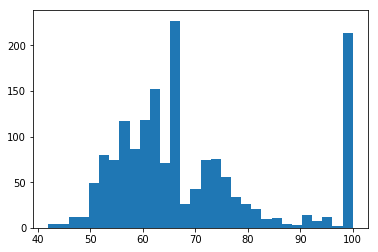

In [27]:
plt.hist([v[1] for k,v in standarize_ingredient_dict_rest.items()], bins=30)

In [28]:
def cleaner(row):
    ingredient_list = row["recipe_ingredients"]
    ingredient_list = set([standarize_ingredient_dict[ing] for ing in ingredient_list if ing in standarize_ingredient_dict])
    return ingredient_list

In [29]:
recipe_puppy_api["recipe_ingredients"] = recipe_puppy_api.apply(lambda row: cleaner(row), axis=1)
recipe_puppy_api["num_ingredients"] = recipe_puppy_api.apply(lambda row: len(row["recipe_ingredients"]), axis=1)
recipe_puppy_api = recipe_puppy_api[recipe_puppy_api["num_ingredients"] >= 2]

In [30]:
recipe_puppy_api.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient,num_ingredients
0,5caa762213218a112b0b979f,"{mushroom, shallot, egg}",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg,3
2,5caa762213218a112b0b97a1,"{lemon, walnut, red currant, egg, ginger, cele...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg,7
3,5caa762213218a112b0b97a2,"{butter, egg}",http://www.recipezaar.com/Ramen-Noodle-Egg-Foo...,Ramen Noodle Egg Foo Yung,egg,2
4,5caa762213218a112b0b97a3,"{cheese, egg}",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg,2
5,5caa762213218a112b0b97a4,"{celery, egg}",http://www.recipezaar.com/Egg-Salad-Sandwich-D...,Egg Salad Sandwich (Diabetic),egg,2


# Quick Analysis of Recipes

In [31]:
print("number of recipes: ", recipe_puppy_api.shape[0])

number of recipes:  75313


In [32]:
ingredient_list = []
for _, rows in recipe_puppy_api.iterrows():
    for ing in rows["recipe_ingredients"]:
        ingredient_list.append(ing)
print("Number of ingredients in Recipe Puppy API: ", len(ingredient_list))

Number of ingredients in Recipe Puppy API:  276104


In [33]:
print("Number of unique ingredients in Recipe Puppy API: ", len(Counter(ingredient_list)))

Number of unique ingredients in Recipe Puppy API:  239


In [34]:
ingredient_counter = pd.DataFrame.from_dict(Counter(ingredient_list), orient='index').reset_index()
ingredient_counter = ingredient_counter.rename(columns= {"index": "ingredient", 0: "quantity"})
ingredient_counter = ingredient_counter.set_index('ingredient')
ingredient_counter = ingredient_counter.sort_values(by= ["quantity"], ascending= False)
ingredient_counter["rank"] = np.arange(len(ingredient_counter))

In [37]:
ingredient_counter.head(10)

,quantity,rank
ingredient,,
butter,21353,0
garlic,16209,1
egg,14549,2
onion,13734,3
milk,7851,4
parsley,6371,5
cinnamon,5601,6
tomato,5535,7
chicken,4923,8


In [38]:
ingredient_counter["quantity"].describe()

count      239.000000
mean      1155.246862
std       2360.343205
min          1.000000
25%        130.500000
50%        492.000000
75%       1176.000000
max      21353.000000
Name: quantity, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

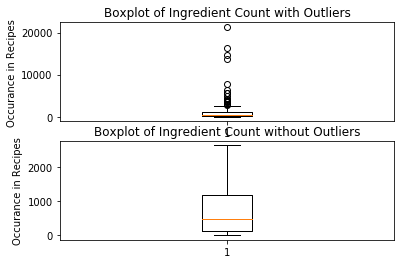

In [39]:
fig, axs = plt.subplots(2)
axs[0].boxplot(ingredient_counter["quantity"])
axs[0].set_title('Boxplot of Ingredient Count with Outliers')
axs[0].set_ylabel("Occurance in Recipes")

axs[1].boxplot(ingredient_counter["quantity"], 0, '')
axs[1].set_title('Boxplot of Ingredient Count without Outliers')
axs[1].set_ylabel("Occurance in Recipes")

plt.show

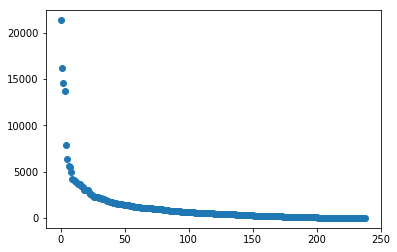

In [40]:
plt.scatter(ingredient_counter["rank"], ingredient_counter["quantity"])

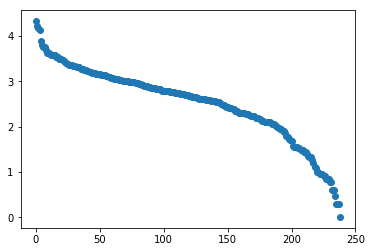

In [41]:
plt.scatter(ingredient_counter["rank"], np.log10(ingredient_counter["quantity"]))

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


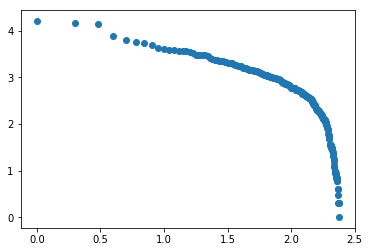

In [42]:
plt.scatter(np.log10(ingredient_counter["rank"]), np.log10(ingredient_counter["quantity"]))

# Sample Graph

In [63]:
sample_recipes = recipe_puppy_api.sample(n=3, random_state=4)

In [64]:
sample_recipes

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient,num_ingredients
30091,5caa797313218a112b0c0d2a,"{tomato, basil, feta cheese, garlic}",http://find.myrecipes.com/recipes/recipefinder...,"Pasta with Basil, Tomatoes, and Feta",feta cheese,4
84915,5caa7fab13218a112b0ce352,"{onion, chicken}",http://allrecipes.com/Recipe/Easy-Creamy-Peppe...,Easy Creamy Peppercorn Chicken,chicken,2
116324,5caa833013218a112b0d5e03,"{okra, onion, tomato}","http://www.cooks.com/rec/view/0,1750,146168-24...",Smothered Okra,okra,3


In [65]:
sample_graph = graph_based_on_shared_recipe_creator(sample_recipes)

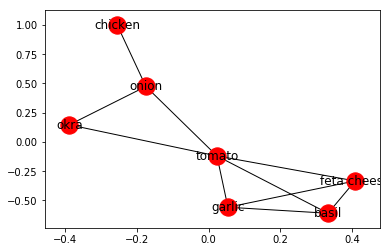

In [66]:
nx.draw_networkx(sample_graph)

In [67]:
nx.degree_centrality(sample_graph)

{'tomato': 0.8333333333333333,
 'basil': 0.5,
 'feta cheese': 0.5,
 'garlic': 0.5,
 'onion': 0.5,
 'chicken': 0.16666666666666666,
 'okra': 0.3333333333333333}

# Making a Graph with Entire Recipe Dataset

In [112]:
recipe_graph = graph_based_on_shared_recipe_creator(recipe_puppy_api)

# EDA with Graphs

# Measures of Centrality

In [182]:
recipe_degree_centrality = nx.degree_centrality(recipe_graph)

In [183]:
sorted_recipe_degree_centrality = sorted(recipe_degree_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [189]:
sorted_recipe_betweenness_centrality

[('butter', 0.01582760240829912),
 ('onion', 0.015263036511761904),
 ('garlic', 0.015086076006397628),
 ('egg', 0.01232826102549305),
 ('cream', 0.010394041200740202),
 ('apple', 0.010133095935087),
 ('milk', 0.009001809516433553),
 ('potato', 0.008819097359781206),
 ('ginger', 0.008811405028367813),
 ('rice', 0.00794599706642511),
 ('cinnamon', 0.0077712288462316575),
 ('tomato', 0.0077162405783214455),
 ('parsley', 0.007598392500618779),
 ('celery', 0.007218433175061786),
 ('carrot', 0.00685710739732492),
 ('lemon', 0.006822700139555304),
 ('honey', 0.006772011522234117),
 ('chicken', 0.0066102445923997355),
 ('mango', 0.006587662518228524),
 ('parmesan cheese', 0.006458770569997602),
 ('nutmeg', 0.006248005711748085),
 ('shallot', 0.006184091185483103),
 ('walnut', 0.0061584230052926054),
 ('orange', 0.006031427873309469),
 ('white pepper', 0.005922004219252092),
 ('thyme', 0.005731622384216879),
 ('yogurt', 0.005548844876719829),
 ('spinach', 0.005378901347057429),
 ('almond', 0.00

In [214]:
dict_sorted_recipe_degree_centrality = OrderedDict(sorted_recipe_degree_centrality)


In [226]:
degree_centrality_pd = pd.DataFrame.from_dict(dict_sorted_recipe_degree_centrality, orient='index', columns= ["degree_centality"])
degree_centrality_pd["degree_centrality_rank"] = np.arange(len(degree_centrality_pd))

degree_centrality_pd.head()

,degree_centality,degree_centrality_rank
onion,0.976744,0
butter,0.972093,1
garlic,0.972093,2
egg,0.962791,3
milk,0.930233,4


# Betweenness Centrality

In [194]:
recipe_betweenness_centrality = nx.betweenness_centrality(recipe_graph)

In [195]:
sorted_recipe_betweenness_centrality = sorted(recipe_betweenness_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [196]:
dict_sorted_recipe_betweenness_centrality = OrderedDict(sorted_recipe_betweenness_centrality)
dict_sorted_recipe_betweenness_centrality

OrderedDict([('butter', 0.01582760240829912),
             ('onion', 0.015263036511761904),
             ('garlic', 0.015086076006397628),
             ('egg', 0.01232826102549305),
             ('cream', 0.010394041200740202),
             ('apple', 0.010133095935087),
             ('milk', 0.009001809516433553),
             ('potato', 0.008819097359781206),
             ('ginger', 0.008811405028367813),
             ('rice', 0.00794599706642511),
             ('cinnamon', 0.0077712288462316575),
             ('tomato', 0.0077162405783214455),
             ('parsley', 0.007598392500618779),
             ('celery', 0.007218433175061786),
             ('carrot', 0.00685710739732492),
             ('lemon', 0.006822700139555304),
             ('honey', 0.006772011522234117),
             ('chicken', 0.0066102445923997355),
             ('mango', 0.006587662518228524),
             ('parmesan cheese', 0.006458770569997602),
             ('nutmeg', 0.006248005711748085),
             ('sh

In [224]:
betweenness_centrality_pd = pd.DataFrame.from_dict(dict_sorted_recipe_betweenness_centrality, orient='index', columns= ["betweenness_centrality"])
betweenness_centrality_pd["betweenness_centrality_rank"] = np.arange(len(betweenness_centrality_pd))
betweenness_centrality_pd.head()

,betweenness_centrality,betweenness_centrality_rank
butter,0.015828,0
onion,0.015263,1
garlic,0.015086,2
egg,0.012328,3
cream,0.010394,4


# Eigen Vector Centrality

In [202]:
recipe_eigenvector_centrality = nx.eigenvector_centrality(recipe_graph, max_iter=10000)

In [203]:
sorted_eigenvector_centrality = sorted(recipe_eigenvector_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [211]:
dict_sorted_eigenvector_centrality = OrderedDict(sorted_page_rank_centrality)


In [223]:
eigenvector_pd = pd.DataFrame.from_dict(dict_sorted_eigenvector_centrality, orient='index', columns= ["eigenvector"])
eigenvector_pd["eigenvector_rank"] = np.arange(len(eigenvector_pd))
eigenvector_pd.head()

,eigenvector,eigenvector_rank
butter,0.062827,0
garlic,0.056006,1
onion,0.050947,2
egg,0.042172,3
parsley,0.024324,4


# Comparing Centralities

In [232]:
combined_graph = pd.merge(degree_centrality_pd, betweenness_centrality_pd, left_index=True, right_index=True)
combined_graph = pd.merge(combined_graph, eigenvector_pd, left_index=True, right_index=True)

In [233]:
combined_graph

,degree_centality,degree_centrality_rank,betweenness_centrality,betweenness_centrality_rank,eigenvector,eigenvector_rank
onion,0.976744,0,1.526304e-02,1,0.050947,2
butter,0.972093,1,1.582760e-02,0,0.062827,0
garlic,0.972093,2,1.508608e-02,2,0.056006,1
egg,0.962791,3,1.232826e-02,3,0.042172,3
milk,0.930233,4,9.001810e-03,6,0.023499,5
rice,0.920930,5,7.945997e-03,9,0.012550,15
tomato,0.911628,6,7.716241e-03,11,0.020967,6
ginger,0.906977,7,8.811405e-03,8,0.014241,11
cream,0.902326,8,1.039404e-02,4,0.008455,25
carrot,0.902326,9,6.857107e-03,14,0.015296,10


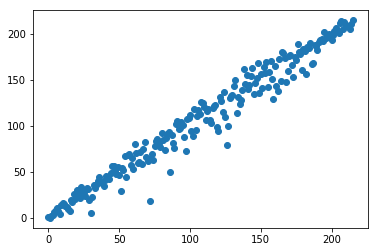

In [234]:
plt.scatter(combined_graph["degree_centrality_rank"], combined_graph["betweenness_centrality_rank"])

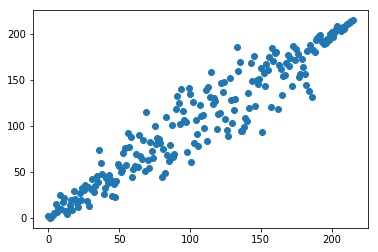

In [235]:
plt.scatter(combined_graph["degree_centrality_rank"], combined_graph["eigenvector_rank"])

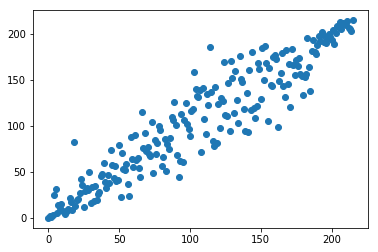

In [236]:
plt.scatter(combined_graph["betweenness_centrality_rank"], combined_graph["eigenvector_rank"])

# Degree Graphs

# Compliments

In [256]:
list_of_edges_quant25 = []
for edge in recipe_graph.edges(data= True):
    ingredient_1 = edge[0]
    ingredient_2 = edge[1]
    quantity_ing1 = recipe_graph.node[ingredient_1]['quantity']
    quantity_ing2 = recipe_graph.node[ingredient_2]['quantity']
    
    if quantity_ing1 >= 25 and quantity_ing2 >= 25:
       list_of_edges_quant25.append(edge)


In [257]:
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['weight'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['weight']))

egg butter 5704
onion garlic 4920
butter onion 3438
butter milk 3187
butter garlic 3072
egg milk 3049
parsley garlic 2660
tomato garlic 2342
celery onion 2301
onion tomato 2152
butter cinnamon 2025
onion parsley 1957
butter parsley 1905
egg onion 1839
egg cinnamon 1792
onion carrot 1657
basil garlic 1609
garlic chicken 1594
garlic thyme 1513
ginger garlic 1455
parmesan cheese garlic 1430
onion potato 1395
butter parmesan cheese 1332
cumin garlic 1300
butter nutmeg 1240
butter potato 1223
mushroom onion 1202
garlic oregano 1200
onion thyme 1190
garlic carrot 1118
nutmeg cinnamon 1114
celery carrot 1113
onion chicken 1096
egg nutmeg 1083
mushroom butter 1079
butter cheddar cheese 1075
mushroom garlic 1072
onion rice 1063
celery garlic 1060
onion milk 1056
butter thyme 1051
celery butter 1040
butter chicken 1027
garlic potato 1021
garlic rosemary 1020
egg garlic 1005
butter cream 992
onion cumin 964
basil tomato 947
butter pecans 924
butter almond 853
onion cheddar cheese 844
rice garlic 

shallot monkfish 22
shallot butternut 22
white pepper goat cheese 22
lemon caviar 22
lemon broccoli 22
lemon sage 22
lemon cardamom 22
cucumber yellowfin tuna 22
ginger oats 22
ginger cherry tomato 22
ginger currant 22
ginger tangerine 22
ginger meat 22
walnut wild rice 22
celery squid 22
butter chayote 22
butter pink salmon 22
onion banana 22
milk roquefort cheese 22
parsley cardamom 22
parsley beetroot 22
basil mustard 22
basil pecans 22
mint fennel 22
cheddar cheese pepper 22
mustard turmeric 22
mustard cinnamon 22
mustard yellowfin tuna 22
tomato radish 22
tomato apple 22
nutmeg oregano 22
nutmeg tarragon 22
nutmeg meat 22
cumin fennel 22
parmesan cheese orange roughy 22
salmon orange 22
cottage cheese almond 22
evaporated milk rice 22
rice vanilla 22
rice eggplant 22
rice yellowfin tuna 22
garlic dates 22
garlic poppy seed 22
jalapeno feta cheese 22
jalapeno lobster 22
chicken pomegranate 22
lettuce corn 22
lettuce roquefort cheese 22
potato almond 22
coffee almond 22
carrot butte

lime crab 7
lime chayote 7
lime lamb 7
lime wasabi 7
lime eggplant 7
lime orange roughy 7
rosemary oyster 7
rosemary pumpkin 7
rosemary quail 7
rosemary anchovy 7
lamb dates 7
lamb chervil 7
grapefruit jicama 7
grapefruit papaya 7
grapefruit fennel 7
leek oyster 7
leek dill 7
sage capers 7
eggplant swordfish 7
marjoram capers 7
fennel monkfish 7
capers haddock 7
oats bartlett pear 7
oats blackberry 7
oats vanilla 7
oats meat 7
mushroom mango 6
mushroom peanut butter 6
shallot banana 6
shallot pineapple 6
shallot evaporated milk 6
shallot dates 6
shallot basmati rice 6
shallot cashew nut 6
white pepper papaya 6
white pepper radish 6
white pepper goat milk 6
white pepper bulgur 6
white pepper bartlett pear 6
white pepper okra 6
lemon melon 6
lemon peanut oil 6
lemon anise 6
lemon basmati rice 6
cucumber saffron 6
cucumber fennel 6
cucumber melon 6
cucumber caviar 6
cucumber plum 6
cucumber nuts 6
cucumber monkfish 6
ginger cottage cheese 6
ginger cheese 6
ginger cherry 6
ginger arrowroot

peach papaya 2
peach jicama 2
peach buffalo 2
peach strawberry jam 2
peach vanilla 2
peach catfish 2
peach sage 2
peach swordfish 2
sweet potato sweetcorn 2
sweet potato dill 2
sweet potato eggplant 2
sweet potato rutabaga 2
sweet potato chayote 2
sweet potato pheasant 2
sweet potato cauliflower 2
sweet potato catfish 2
quinoa jicama 2
barley eggplant 2
barley provolone cheese 2
barley amaranth 2
barley winter squash 2
barley summer savory 2
barley dates 2
barley fennel 2
barley capers 2
barley butternut squash 2
barley wild rice 2
barley meat 2
leek corn oil 2
leek sweetcorn 2
leek plum 2
leek ghee 2
leek oats 2
leek semolina 2
leek beetroot 2
sage oats 2
sage brussels sprout 2
sage goat milk 2
sage brazil nut 2
sage peanut oil 2
sage cauliflower 2
sage swordfish 2
sage albacore tuna 2
sage anchovy 2
sage yellow zucchini 2
parsnip dill 2
parsnip cauliflower 2
parsnip jicama 2
parsnip pomegranate 2
parsnip cashew nut 2
parsnip eggplant 2
parsnip pheasant 2
parsnip meat 2
eggplant buffa

In [271]:
pmi_counter = 0
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['pmi'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['pmi']))
    pmi_counter += 1
print(pmi_counter)

turnip rutabaga 2.247396408111677
fenugreek mustard oil 2.1996182852613257
parsnip rutabaga 1.9085778515582963
ghee semolina 1.8026690486034738
turmeric fenugreek 1.793964139815848
goat cheese goat milk 1.6985447749370608
turmeric mustard oil 1.677757815903293
ghee fenugreek 1.6154330177030676
amaranth brussels sprout 1.594240869670217
peanut butter peanut oil 1.5631043077653182
amaranth fenugreek 1.5207182637006411
chervil beetroot 1.493927237781505
arrowroot soy yogurt 1.485261037653689
cornbread sage 1.4769245783002052
fenugreek basmati rice 1.4726195573250636
dates brazil nut 1.469416106158465
summer savory albacore tuna 1.4668589183076715
wasabi yellowfin tuna 1.4518846433352153
cardamom ghee 1.445075102400329
peanut peanut oil 1.4104432457039122
turmeric ghee 1.409842510565753
arrowroot amaranth 1.4084210074209667
coriander fenugreek 1.3907913679025412
marjoram summer savory 1.3783587431122155
cherry pepper codfish 1.373464649860947
turnip parsnip 1.3455011797326772
horseradish b

milk bitter orange 0.17677249329827524
salmon pink salmon 0.17653239112195143
egg cheese 0.17632554969281022
mint mandarin orange 0.17629435632185542
pineapple bartlett pear 0.17602396776913717
vinegar raspberry 0.17594914746024273
mustard roquefort cheese 0.17590275374347006
garlic beetroot 0.1758692502522001
lettuce bartlett pear 0.17582447558285338
cinnamon blackberry 0.17572864028869148
caviar sweet potato 0.17532325006219177
raisin apricot 0.17506880259687732
walnut chocolate spread 0.1749881902917919
chicken fenugreek 0.1749296287844959
pecans orange 0.17485047401381595
onion horseradish 0.17473603007106944
egg plum 0.17470142285320603
green tea apricot 0.1746332012745979
cucumber cabbage 0.17441005725652742
cinnamon apple cider vinegar 0.17432672006126643
garlic spinach 0.1743179045428248
nutmeg buttermilk 0.1742091651066892
mandarin orange lamb 0.17418099700845624
garlic chicken 0.1739302861625965
asparagus lobster 0.17338837556224604
quail capers 0.1733731144014995
ginger oyst

shallot red rice -0.12970676247687088
oregano lime -0.12993165378108787
potato buttermilk -0.12994433999119565
white pepper pheasant -0.13036098419182857
walnut turnip -0.13039535947651568
asparagus jicama -0.1304669659152228
ginger mustard -0.13050805166381702
mushroom ginger -0.13064695103975751
vinegar clam -0.1306559502052843
cheese poppy seed -0.13070103657769994
egg leek -0.1307238593784788
milk orange roughy -0.1307604289397212
cheese chicken -0.1307892809104029
egg jalapeno -0.1308525857581131
coffee yogurt -0.13095214643257283
pork peach -0.13115011117002726
evaporated milk dates -0.13119381877426464
milk almond -0.13123709947588816
banana cherry -0.13136905434382481
romano cheese buffalo -0.13149679167201545
shallot apple -0.13168532845895883
basil avocado -0.13179649889591982
evaporated milk popcorn -0.13204788882710405
cream cherry tomato -0.13209639756859157
cream cheese green tea -0.13212635614356316
jalapeno feta cheese -0.13213724965846385
mustard butternut -0.132183057

avocado tangerine -0.49166288904673117
buttermilk apple -0.49190004297372153
cream cheese sweet potato -0.49202654879515295
parsley mandarin orange -0.4924551008157855
potato shrimp -0.492549493299272
tarragon apple cider vinegar -0.49266972067898473
celery pomegranate -0.4931446176521854
butter wasabi -0.4932738190906165
broccoli sweet potato -0.4933762832840618
basil pear -0.49339890199141134
jalapeno raisin -0.4934433376682461
ricotta cheese strawberry -0.49382683876170097
cinnamon sage -0.49409493502305646
horseradish spinach -0.4941690973323049
garlic cinnamon -0.4942302155341459
tomato wild rice -0.4942487772295474
tarragon plum -0.49426639336678013
mozzarella cheese shrimp -0.49453466684458147
lettuce rosemary -0.49459707231552896
milk turnip -0.4947674015666
feta cheese buttermilk -0.4948265833010819
mint yellowfin tuna -0.49517014218718036
tomato coconut -0.49517433627728913
honey catfish -0.49555026867263297
swiss cheese tofu -0.4957503966967127
vinegar feta cheese -0.4957744

In [259]:
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['iou'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['iou']))

peanut butter peanut oil 0.20165033522434245
onion garlic 0.16412582980284884
egg butter 0.16058106472227696
celery carrot 0.14108251996450755
egg milk 0.1381951683814531
nutmeg cinnamon 0.133445136559655
celery onion 0.12840401785714287
cumin coriander 0.12691204588910135
parsley garlic 0.11761064685855772
peanut peanut oil 0.11360239162929746
onion tomato 0.11168777247249326
butter milk 0.11019293271557984
coriander turmeric 0.10988037217545414
tomato garlic 0.10754465720714515
basil tomato 0.10557413600891861
corn corn oil 0.10237807335751713
cornbread sage 0.1
cinnamon apple 0.09848778596355176
butter onion 0.09844233192074218
onion parsley 0.09732444798090312
onion carrot 0.0950278144176177
egg cinnamon 0.09019528890678478
cinnamon raisin 0.08897742363877822
swiss cheese ham 0.08857715430861723
parmesan cheese mozzarella cheese 0.08832644628099173
cumin turmeric 0.08724230654317298
cocoa powder chocolate spread 0.08584005869405723
peanut popcorn 0.08313349320543566
peanut butter p

mint rosemary 0.007381012980402138
rice cabbage 0.0073759499329459095
basil fennel 0.00737350622934147
shallot milk 0.0073734555599840575
white pepper swordfish 0.00737230121116377
white pepper ricotta cheese 0.007367196587824738
shallot butternut squash 0.007366482504604052
cream pecans 0.007366071428571428
avocado pecans 0.0073594347954077126
parsley buttermilk 0.007357686846521234
mushroom mustard 0.007352941176470588
turkey almond 0.007348618459729571
almond bartlett pear 0.0073439412484700125
mushroom rabbit 0.007341694707861731
condensed milk raisin 0.007341576506955177
coconut peanut butter 0.007340241796200345
mandarin orange poppy seed 0.007339449541284404
evaporated milk coffee 0.007336757153338224
onion orange 0.007333547764554519
jalapeno feta cheese 0.007330889703432189
cream rosemary 0.007326873079650201
mint radish 0.007324429125376993
avocado blue cheese 0.007321274763135229
pork beef 0.007320644216691069
shallot cheese 0.007320261437908497
mustard yogurt 0.007312614259

cinnamon rosemary 0.0031014023732470336
gruyere cheese turnip 0.0031007751937984496
pork raisin 0.0030991735537190084
raisin rosemary 0.0030991735537190084
walnut poppy seed 0.003098106712564544
salmon papaya 0.0030978934324659233
turnip pheasant 0.0030959752321981426
pear sweet potato 0.003092783505154639
garlic yellowfin tuna 0.0030926608778398955
mushroom buffalo 0.0030911901081916537
cornbread pork 0.0030911901081916537
butter skimmed milk 0.0030909761948699024
banana brazil nut 0.0030902348578491965
provolone cheese meat 0.003089598352214212
butter monkfish 0.00308930911814267
cream oregano 0.003088462386940216
romano cheese semolina 0.0030864197530864196
gruyere cheese basmati rice 0.0030864197530864196
turmeric pork 0.0030845157310302285
shrimp monkfish 0.003083247687564234
shallot corn oil 0.0030821917808219177
milk vinegar 0.003080785029666819
mustard oats 0.0030807147258163892
pineapple bartlett pear 0.0030807147258163892
tomato cauliflower 0.00308060927605682
broccoli crab 0

pecans provolone cheese 0.0011636927851047323
tarragon strawberry 0.0011634671320535194
oregano papaya 0.0011632415664986429
nuts papaya 0.0011621150493898896
cucumber green tea 0.0011614401858304297
radish oats 0.0011614401858304297
provolone cheese butternut squash 0.0011614401858304297
mushroom poppy seed 0.0011607661056297156
walnut arrowroot 0.0011605415860735009
radish wild rice 0.001160092807424594
cinnamon fennel 0.001160092807424594
yogurt cherry 0.001160092807424594
apricot semolina 0.001160092807424594
nutmeg dill 0.0011597564511452595
radish leek 0.0011594202898550724
banana rabbit 0.0011594202898550724
mint romano cheese 0.0011587485515643105
salmon buttermilk 0.0011587485515643105
horseradish butternut squash 0.0011587485515643105
jalapeno wasabi 0.0011587485515643105
feta cheese parsnip 0.0011587485515643105
lime winter squash 0.0011587485515643105
thyme albacore tuna 0.0011577424023154848
water chestnut peanut butter 0.0011574074074074073
beef wild rice 0.00115673799884

# Girvan Newman

In [275]:
weight_list = []
for edge in recipe_graph.edges(data = True):
    weight = edge[2]["weight"]
    weight_list.append(weight)
    

In [269]:
from scipy import stats

In [276]:
weight_array = np.array(weight_list)
weight_array

array([328, 193,  88, ...,   1,   1,   1])

In [277]:
stats.describe(weight_array)

DescribeResult(nobs=12604, minmax=(1, 5704), mean=36.40875912408759, variance=19823.27271863784, skewness=16.817440641041703, kurtosis=455.4110142458199)

# Substitutes

p(x)

R p x

In [94]:
p = "turnip" 
x = "onion"
q = "rutabaga"
rpx = recipe_graph[p][x]["weight"]
rpx

44

In [105]:
recipe_graph.get_edge_data(p, "rutabaga")

{'weight': 8, 'pmi': 2.230544633049769, 'iou': 0.05128205128205128}

In [71]:
recipe_graph.edges(p, data = True)

EdgeDataView([('turnip', 'turkey', {'weight': 3, 'pmi': 0.18996957188309388, 'iou': 0.002271006813020439}), ('turnip', 'egg', {'weight': 3, 'pmi': -0.9172062966708147, 'iou': 0.0001946914141086378}), ('turnip', 'onion', {'weight': 44, 'pmi': 0.27621137144588814, 'iou': 0.0030376251294442526}), ('turnip', 'carrot', {'weight': 57, 'pmi': 0.9562247033655094, 'iou': 0.01420383752803389}), ('turnip', 'barley', {'weight': 11, 'pmi': 0.9200877203750302, 'iou': 0.01167728237791932}), ('turnip', 'celery', {'weight': 22, 'pmi': 0.4808034725799455, 'iou': 0.00477326968973747}), ('turnip', 'beef', {'weight': 6, 'pmi': 0.49907628265835347, 'iou': 0.004618937644341801}), ('turnip', 'butter', {'weight': 46, 'pmi': 0.09421871698933582, 'iou': 0.0020042699664502635}), ('turnip', 'potato', {'weight': 25, 'pmi': 0.6025575892630439, 'iou': 0.006289308176100629}), ('turnip', 'lamb', {'weight': 7, 'pmi': 0.6221134592658663, 'iou': 0.006050129645635264}), ('turnip', 'thyme', {'weight': 26, 'pmi': 0.644082690

R P Y summation for all ingredients

In [83]:
sum([data["weight"] for a,b, data in recipe_graph.edges(p, data = True)])

592

In [91]:
recipe_graph.node[p]

{'ingredient_node': True,
 'molecule_node': False,
 'category': 'Vegetable Root',
 'quantity': 127}

In [194]:
def bhattacharyya_quotient(ingredient_1 = "egg", x = "flour"):
    
    if recipe_graph.get_edge_data(ingredient_1, x) == None:
        ing_1_quotient = 0
    
    else:
        ing_1_numerator = recipe_graph.get_edge_data(ingredient_1, x)["weight"]
        ing_1_denominator = sum([data["weight"] for _, __, data in recipe_graph.edges(ingredient_1, data = True)])
        ing_1_quotient = ing_1_numerator / ing_1_denominator 
    
    return ing_1_quotient

In [232]:
def bhattacharyya_distance(ingredient_1 = "pecans", ingredient_2 = "walnut", graph= recipe_graph):
    result = 0 
    for iter_ing in graph.nodes():
        quot_1 = bhattacharyya_quotient(ingredient_1, iter_ing)
        quot_2 = bhattacharyya_quotient(ingredient_2, iter_ing)
        result += (quot_1 * quot_2) ** 0.5
    return -1 * np.log10(result)

In [233]:
bhattacharyya_distance()

0.015992631027561786

# Bhattacharyya Distance on every possible combination

In [234]:
dict_bhattacharry_distance  = {}
for combo in combinations(recipe_graph.nodes(), 2):
#     if recipe_graph.nodes[combo[0]]['quantity'] < 2000 or recipe_graph.nodes[combo[1]]['quantity'] < 2000:
#         continue
    
    dict_bhattacharry_distance[combo] = bhattacharyya_distance(combo[0], combo[1])


/home/ryoiwata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


In [235]:
dict_bhattacharry_distance

{('white pepper', 'egg'): 0.06542481800732465,
 ('white pepper', 'mushroom'): 0.030581148713462042,
 ('white pepper', 'shallot'): 0.03281002486134788,
 ('white pepper', 'ginger'): 0.07321600926218337,
 ('white pepper', 'cucumber'): 0.09652909788955849,
 ('white pepper', 'lemon'): 0.03541562538786783,
 ('white pepper', 'red currant'): 0.2254816161216879,
 ('white pepper', 'celery'): 0.03896500563977031,
 ('white pepper', 'walnut'): 0.07630169722943873,
 ('white pepper', 'butter'): 0.058572298893463104,
 ('white pepper', 'cheese'): 0.03590273051564559,
 ('white pepper', 'onion'): 0.03969772595475256,
 ('white pepper', 'milk'): 0.06416822330121608,
 ('white pepper', 'basil'): 0.049435930661889636,
 ('white pepper', 'mint'): 0.07854475776339574,
 ('white pepper', 'chive'): 0.022141242304505232,
 ('white pepper', 'parsley'): 0.026740686950173915,
 ('white pepper', 'mustard'): 0.0411512627542403,
 ('white pepper', 'tomato'): 0.04443216008394792,
 ('white pepper', 'flour'): 0.0737178596291585

In [236]:
sorted_dict_bhattacharry_distance = sorted(dict_bhattacharry_distance.items(), key=lambda kv: kv[1])

In [237]:
sorted_dict_bhattacharry_distance

[(('walnut', 'pecans'), 0.015992631027561786),
 (('milk', 'skimmed milk'), 0.01969130052850979),
 (('cheese', 'cheddar cheese'), 0.020758856383458413),
 (('white pepper', 'chive'), 0.022141242304505232),
 (('walnut', 'almond'), 0.025280848456086302),
 (('parmesan cheese', 'romano cheese'), 0.02654215229680028),
 (('white pepper', 'parsley'), 0.026740686950173915),
 (('white pepper', 'potato'), 0.02743646945584778),
 (('milk', 'evaporated milk'), 0.02788176595653082),
 (('white pepper', 'leek'), 0.02823937284073544),
 (('shallot', 'lemon'), 0.028336436142838588),
 (('chicken', 'turkey'), 0.028716291184999895),
 (('cheese', 'swiss cheese'), 0.028874325568267512),
 (('parsley', 'thyme'), 0.028994108654302433),
 (('winter squash', 'butternut squash'), 0.029137430905819255),
 (('shallot', 'chive'), 0.029637308496894013),
 (('white pepper', 'thyme'), 0.029751848864108747),
 (('mushroom', 'thyme'), 0.029791831961968565),
 (('mushroom', 'parsley'), 0.030373500165506127),
 (('clove', 'allspice'

In [228]:
recipe_graph.nodes["egg"]

{'ingredient_node': True,
 'molecule_node': False,
 'category': 'Animal Product',
 'quantity': 15282}

[(('walnut', 'pecans'), 0.015992631027561786),
 (('milk', 'skimmed milk'), 0.01969130052850979),
 (('cheese', 'cheddar cheese'), 0.020758856383458413),
 (('white pepper', 'chive'), 0.022141242304505232),
 (('walnut', 'almond'), 0.025280848456086302),
 (('parmesan cheese', 'romano cheese'), 0.02654215229680028),
 (('white pepper', 'parsley'), 0.026740686950173915),
 (('white pepper', 'potato'), 0.02743646945584778),
 (('milk', 'evaporated milk'), 0.02788176595653082),
 (('white pepper', 'leek'), 0.02823937284073544),
 (('shallot', 'lemon'), 0.028336436142838588),
 (('chicken', 'turkey'), 0.028716291184999895),
 (('cheese', 'swiss cheese'), 0.028874325568267512),
 (('parsley', 'thyme'), 0.028994108654302433),
 (('winter squash', 'butternut squash'), 0.029137430905819255),
 (('shallot', 'chive'), 0.029637308496894013),
 (('white pepper', 'thyme'), 0.029751848864108747),
 (('mushroom', 'thyme'), 0.029791831961968565),
 (('mushroom', 'parsley'), 0.030373500165506127),
 (('clove', 'allspice'), 0.03042292262524438),
 (('white pepper', 'mushroom'), 0.030581148713462042),
 (('pecans', 'almond'), 0.03061444424266615),
 (('white pepper', 'tarragon'), 0.03092448013271665),
 (('cheese', 'parmesan cheese'), 0.03097950054800081),
 (('sweet potato', 'yam'), 0.031083459937286693),
 (('chicken', 'shrimp'), 0.03163944828548799),
 (('plum', 'apricot'), 0.03191610601043731),
 (('thyme', 'rosemary'), 0.03192963348900025),
 (('rosemary', 'marjoram'), 0.032015391231895396),
 (('honey', 'orange'), 0.03242587283732452),
 (('tomato', 'cherry tomato'), 0.03251036216192002),
 (('milk', 'buttermilk'), 0.032581199941510715),
 (('mushroom', 'celery'), 0.03260822322134255),
 (('thyme', 'marjoram'), 0.03267972185722435),
 (('blackberry', 'raspberry'), 0.03268375657039242),
 (('mushroom', 'marjoram'), 0.03276794109350866),
 (('white pepper', 'shallot'), 0.03281002486134788),
 (('parsley', 'spinach'), 0.03283424944542265),
 (('sage', 'marjoram'), 0.03288480236668147),
 (('cheddar cheese', 'swiss cheese'), 0.032936839941316534),
 (('white pepper', 'pepper'), 0.03295336297563834),
 (('chive', 'asparagus'), 0.03325625315298724),
 (('potato', 'thyme'), 0.033400773432801956),
 (('blue cheese', 'roquefort cheese'), 0.033459643372212744),
 (('mushroom', 'potato'), 0.03349218963433239),
 (('sweet potato', 'butternut squash'), 0.03350297008384161),
 (('plum', 'prickly pear'), 0.03378351962440435),
 (('parsley', 'rosemary'), 0.03378645124424151),
 (('chive', 'parsley'), 0.03383918843398103),
 (('fish', 'lobster'), 0.033897448999353576),
 (('thyme', 'sage'), 0.03400490686563681),
 (('nuts', 'pecans'), 0.03413923134160778),
 (('shallot', 'onion'), 0.03418304412425414),
 (('bartlett pear', 'prickly pear'), 0.03442343692769297),
 (('tarragon', 'thyme'), 0.03473301688667244),
 (('white pepper', 'carrot'), 0.034771981589772696),
 (('chive', 'leek'), 0.03497325857174126),
 (('chive', 'thyme'), 0.035257795536759964),
 (('peach', 'apricot'), 0.035324863062122944),
 (('tarragon', 'fennel'), 0.03537662711802633),
 (('white pepper', 'lemon'), 0.03541562538786783),
 (('basil', 'spinach'), 0.03556194369500145),
 (('parsley', 'marjoram'), 0.035741058390228266),
 (('basil', 'parsley'), 0.03578441613970702),
 (('parsley', 'potato'), 0.03579106315258766),
 (('thyme', 'leek'), 0.03584879821535855),
 (('white pepper', 'cream'), 0.03590153176071061),
 (('white pepper', 'cheese'), 0.03590273051564559),
 (('romano cheese', 'provolone cheese'), 0.0360192006809886),
 (('broccoli', 'spinach'), 0.036096416303985725),
 (('parsnip', 'leek'), 0.03614332173152845),
 (('chive', 'tarragon'), 0.03623835020940512),
 (('parsley', 'leek'), 0.03632654975048029),
 (('basil', 'oregano'), 0.03633453501431125),
 (('currant', 'raisin'), 0.03647031483899562),
 (('shallot', 'parsley'), 0.03648596893049667),
 (('potato', 'leek'), 0.036496273753929574),
 (('spinach', 'asparagus'), 0.03657478175796906),
 (('celery', 'thyme'), 0.03658782392409654),
 (('white pepper', 'asparagus'), 0.03661312805879911),
 (('chicken', 'pork'), 0.03670233327672222),
 (('shallot', 'leek'), 0.03678736441401048),
 (('mushroom', 'carrot'), 0.03686294062840946),
 (('tarragon', 'leek'), 0.03696652586156405),
 (('parsley', 'asparagus'), 0.037042540217930436),
 (('parsley', 'pepper'), 0.03723457036932611),
 (('mozzarella cheese', 'provolone cheese'), 0.0374977488695388),
 (('chive', 'spinach'), 0.03767345345352922),
 (('oregano', 'cherry tomato'), 0.03767585812174505),
 (('carrot', 'thyme'), 0.0377847459793727),
 (('sage', 'rosemary'), 0.03788983976319628),
 (('lemon', 'chive'), 0.03815475916974138),
 (('tarragon', 'rosemary'), 0.03827653898508433),
 (('parsley', 'tomato'), 0.0383236953768516),
 (('white pepper', 'sage'), 0.03832867616246678),
 (('leek', 'rosemary'), 0.0383717754737211),
 (('white pepper', 'chicken'), 0.03837313113620204),
 (('sweet potato', 'winter squash'), 0.03846176011168271),
 (('tomato', 'oregano'), 0.03851897587929799),
 (('mushroom', 'broccoli'), 0.038585351767203936),
 (('beef', 'turkey'), 0.038695559748002935),
 (('white pepper', 'spinach'), 0.03871671541116329),
 (('fish', 'shrimp'), 0.03872771952098796),
 (('nutmeg', 'pecans'), 0.038789597515901005),
 (('fish', 'squid'), 0.03883531160311627),
 (('walnut', 'nutmeg'), 0.038838679866724395),
 (('shallot', 'fennel'), 0.03893023347431445),
 (('white pepper', 'celery'), 0.03896500563977031),
 (('parsley', 'green beans'), 0.03904175031053488),
 (('shallot', 'thyme'), 0.039193824722166704),
 (('bulgur', 'quinoa'), 0.039273905388107745),
 (('orange', 'yogurt'), 0.039294663159715235),
 (('lobster', 'haddock'), 0.039335561719204735),
 (('pecans', 'apple'), 0.03944915132504325),
 (('milk', 'cream'), 0.03948876212581419),
 (('coriander', 'turmeric'), 0.03958552252809674),
 (('mozzarella cheese', 'romano cheese'), 0.039653345740549226),
 (('white pepper', 'onion'), 0.03969772595475256),
 (('salmon', 'atlantic salmon'), 0.03971962603331425),
 (('parsley', 'tarragon'), 0.03976256220546426),
 (('mushroom', 'asparagus'), 0.03979057254119462),
 (('pepper', 'cherry tomato'), 0.03979149981890923),
 (('mango', 'papaya'), 0.03984120712798399),
 (('shallot', 'rosemary'), 0.03988236922236324),
 (('evaporated milk', 'skimmed milk'), 0.039926359967166654),
 (('apricot', 'prickly pear'), 0.03993807970514704),
 (('raisin', 'dates'), 0.03993997522131402),
 (('mushroom', 'pepper'), 0.039946479425194685),
 (('chicken', 'beef'), 0.04009938584296138),
 (('chive', 'potato'), 0.04013852841783802),
 (('mushroom', 'sage'), 0.04016930331982235),
 (('rabbit', 'pheasant'), 0.04017793968471474),
 (('celery', 'parsley'), 0.04019442733414342),
 (('leek', 'marjoram'), 0.04035991147355691),
 (('mandarin orange', 'apricot'), 0.04037925309592704),
 (('mushroom', 'oyster mushroom'), 0.040440788352374),
 (('cheese', 'chive'), 0.040447621958108304),
 (('shallot', 'tarragon'), 0.04046359910940429),
 (('mushroom', 'basil'), 0.040476332065829006),
 (('white pepper', 'fennel'), 0.04051627628069528),
 (('lemon', 'pepper'), 0.0406548213494479),
 (('shallot', 'asparagus'), 0.040664928014476284),
 (('tomato', 'pepper'), 0.04068757180772259),
 (('white pepper', 'rosemary'), 0.04069422673622769),
 (('cheese', 'mustard'), 0.04079404576018203),
 (('parsley', 'carrot'), 0.040904194918535995),
 (('apple', 'allspice'), 0.04099538041207114),
 (('mushroom', 'leek'), 0.041019730940153966),
 (('tarragon', 'asparagus'), 0.041042572475887766),
 (('pepper', 'thyme'), 0.041117826318439125),
 (('walnut', 'nuts'), 0.041130894625966676),
 (('white pepper', 'mustard'), 0.0411512627542403),
 (('thyme', 'green beans'), 0.04117281242293932),
 (('mushroom', 'tarragon'), 0.0412493403613208),
 (('mushroom', 'rosemary'), 0.04137614957713647),
 (('mushroom', 'chive'), 0.04144370646619236),
 (('lemon', 'rice'), 0.04145242173228602),
 (('oregano', 'pepper'), 0.0414876419725677),
 (('white pepper', 'shrimp'), 0.041490687430805875),
 (('buttermilk', 'skimmed milk'), 0.04150681393289487),
 (('swiss cheese', 'gruyere cheese'), 0.04152307774893712),
 (('onion', 'parsley'), 0.04152954111159216),
 (('sage', 'leek'), 0.041625322477239914),
 (('raisin', 'allspice'), 0.04163055421872852),
 (('apple', 'raisin'), 0.041637820909739456),
 (('raisin', 'apricot'), 0.04164201439734417),
 (('parsley', 'oregano'), 0.041659018741676476),
 (('nutmeg', 'apple'), 0.041673566422291475),
 (('walnut', 'apple'), 0.04167972990632462),
 (('honey', 'yogurt'), 0.041756308988272435),
 (('parsley', 'chicken'), 0.041775491517573364),
 (('chicken', 'pepper'), 0.041918330263774006),
 (('raisin', 'plum'), 0.04199555202925451),
 (('raspberry', 'strawberry'), 0.042098670281091474),
 (('cream cheese', 'cottage cheese'), 0.042202513982612724),
 (('honey', 'almond'), 0.04222168168856651),
 (('rice', 'yogurt'), 0.04228859178781141),
 (('spinach', 'pepper'), 0.0423440367141966),
 (('almond', 'raisin'), 0.04243422092543581),
 (('lemon', 'parsley'), 0.04243735583319378),
 (('shrimp', 'pepper'), 0.04245988980299089),
 (('oregano', 'eggplant'), 0.0424630454939256),
 (('mushroom', 'green beans'), 0.042563021992754045),
 (('mushroom', 'tomato'), 0.04261101583776059),
 (('dates', 'apricot'), 0.04266919922460945),
 (('pecans', 'raisin'), 0.0426712875952765),
 (('mint', 'yogurt'), 0.04268265456335722),
 (('squid', 'monkfish'), 0.04268510544228308),
 (('apple', 'sweet potato'), 0.04270269920286144),
 (('chicken', 'carrot'), 0.042728502255499734),
 (('lemon', 'fennel'), 0.042790741743521064),
 (('carrot', 'pork'), 0.0428335173005841),
 (('nutmeg', 'raisin'), 0.04284271980674664),
 (('lemon', 'thyme'), 0.04300844867374516),
 (('peach', 'plum'), 0.043022588649319946),
 (('pepper', 'rosemary'), 0.043054255609388976),
 (('allspice', 'sweet potato'), 0.04308421761726594),
 (('cheese', 'cottage cheese'), 0.04309443791783608),
 (('basil', 'pepper'), 0.043108478873572435),
 (('mustard', 'potato'), 0.04313829451438538),
 (('kale', 'thyme'), 0.04313855791818169),
 (('potato', 'sage'), 0.04314565838122621),
 (('vinegar', 'carrot'), 0.0431596801927332),
 (('lemon', 'tarragon'), 0.04319689812402595),
 (('chive', 'pepper'), 0.04321766445224145),
 (('potato', 'pepper'), 0.04326101069808967),
 (('peach', 'prickly pear'), 0.043263978354561264),
 (('potato', 'marjoram'), 0.04329647340752291),
 (('apple', 'clove'), 0.04333654659640849),
 (('chicken', 'green beans'), 0.043390968798891004),
 (('chervil', 'fennel'), 0.04342489065457709),
 (('walnut', 'hazelnut'), 0.04351757958193494),
 (('pepper', 'green beans'), 0.043626790535608834),
 (('honey', 'apple'), 0.04368414755614115),
 (('apple', 'almond'), 0.04371476351532007),
 (('nutmeg', 'sweet potato'), 0.04373690856246772),
 (('cream', 'almond'), 0.04376979635580359),
 (('chive', 'cream'), 0.04383706494844081),
 (('fish', 'monkfish'), 0.043853870538552504),
 (('onion', 'leek'), 0.04386962879861383),
 (('asparagus', 'green beans'), 0.04388126844017345),
 (('white pepper', 'lobster'), 0.043896942561584176),
 (('cumin', 'coriander'), 0.04393327978376686),
 (('turnip', 'parsnip'), 0.0440832596446764),
 (('ginger', 'clove'), 0.04411526249752091),
 (('white pepper', 'parmesan cheese'), 0.04413526066745514),
 (('ham', 'turkey'), 0.04417795998195534),
 (('carrot', 'sage'), 0.044191999454110696),
 (('pork', 'turkey'), 0.04419881513339144),
 (('vinegar', 'yogurt'), 0.044265094709584764),
 (('coconut', 'apricot'), 0.04428467624016179),
 (('white pepper', 'marjoram'), 0.04441745756971784),
 (('white pepper', 'tomato'), 0.04443216008394792),
 (('onion', 'thyme'), 0.04447100036559472),
 (('cheese', 'spinach'), 0.04451041611398945),
 (('milk', 'nutmeg'), 0.04456290623479201),
 (('thyme', 'fennel'), 0.04462419853423194),
 (('cocoa powder', 'chocolate'), 0.0446261659993597),
 (('nutmeg', 'almond'), 0.04465316937761302),
 (('tarragon', 'chervil'), 0.0447138914364187),
 (('mushroom', 'chicken'), 0.04472766953882734),
 (('kale', 'parsnip'), 0.044774703795282485),
 (('parsley', 'sage'), 0.0447934420694616),
 (('oregano', 'marjoram'), 0.04481371765163155),
 (('potato', 'carrot'), 0.04482502721753879),
 (('raisin', 'clove'), 0.04492106391542502),
 (('clove', 'sweet potato'), 0.044991852405874104),
 (('celery', 'green beans'), 0.04501146885430622),
 (('mushroom', 'oregano'), 0.045018672871302304),
 (('lemon', 'carrot'), 0.04511442227682895),
 (('lemon', 'vinegar'), 0.045121202795320406),
 (('milk', 'almond'), 0.045192479982899936),
 (('apricot', 'cherry'), 0.045195416846230865),
 (('chive', 'chicken'), 0.04519912571599833),
 (('orange', 'almond'), 0.045264145306882234),
 (('mushroom', 'parmesan cheese'), 0.045305197171589214),
 (('cheese', 'gruyere cheese'), 0.04535530653436283),
 (('chive', 'mustard'), 0.04546121195234323),
 (('rosemary', 'green beans'), 0.045468983386369274),
 (('pork', 'beef'), 0.045471263518228784),
 (('flour', 'cream'), 0.04550064398299173),
 (('parsley', 'broccoli'), 0.045505230846117614),
 (('milk', 'cream cheese'), 0.045528570398069845),
 (('nutmeg', 'evaporated milk'), 0.0455614769068368),
 (('mushroom', 'spinach'), 0.045586095162153326),
 (('spinach', 'oregano'), 0.04559263718033428),
 (('cheese', 'parsley'), 0.04559596110735646),
 (('leek', 'fennel'), 0.04561360072677074),
 (('chicken', 'spinach'), 0.045697029511147534),
 (('gruyere cheese', 'oyster mushroom'), 0.045708868001933384),
 (('basil', 'eggplant'), 0.04574514855571609),
 (('basil', 'thyme'), 0.045830038732808),
 (('beef', 'kale'), 0.04584470116366522),
 (('lemon', 'yogurt'), 0.04585266965098683),
 (('cheese', 'romano cheese'), 0.04585416103382576),
 (('tarragon', 'pepper'), 0.04586064858237852),
 (('celery', 'carrot'), 0.04586209907990407),
 (('potato', 'tarragon'), 0.045866411997843866),
 (('white pepper', 'fish'), 0.04591685186477151),
 (('onion', 'chive'), 0.04594405650487991),
 (('mint', 'lime'), 0.045947937553898296),
 (('chive', 'parmesan cheese'), 0.04595305058071137),
 (('flour', 'nutmeg'), 0.04595515366578116),
 (('celery', 'potato'), 0.04595692184169332),
 (('jalapeno', 'pepper'), 0.04597168161519101),
 (('shallot', 'chicken'), 0.046003221366901145),
 (('ginger', 'rice'), 0.04600999598923033),
 (('apple', 'plum'), 0.04604903582372533),
 (('saffron', 'fennel'), 0.04612510979165268),
 (('celery', 'cabbage'), 0.04612931975944423),
 (('chicken', 'thyme'), 0.0461886701749217),
 (('shrimp', 'lobster'), 0.046307864301821766),
 (('white pepper', 'green beans'), 0.04639149516056965),
 (('thyme', 'asparagus'), 0.0463952006583009),
 (('chive', 'fennel'), 0.0464035352472351),
 (('sage', 'parsnip'), 0.046468212253410246),
 (('plum', 'dates'), 0.04648010331450137),
 (('walnut', 'milk'), 0.0464823022489919),
 (('cherry tomato', 'capers'), 0.046491947059561584),
 (('walnut', 'cream'), 0.04650209508065417),
 (('fennel', 'monkfish'), 0.046505079353961386),
 (('cocoa powder', 'vanilla'), 0.0465295034481673),
 (('pork', 'butternut squash'), 0.04654021205768199),
 (('rice', 'vinegar'), 0.04657062013012714),
 (('carrot', 'pepper'), 0.04661145112167958),
 (('chive', 'chervil'), 0.04661861513694172),
 (('cinnamon', 'raisin'), 0.046637416768879225),
 (('nutmeg', 'cream'), 0.04664559685380409),
 (('shallot', 'pepper'), 0.046655251832781616),
 (('broccoli', 'asparagus'), 0.046668654950569516),
 (('walnut', 'raisin'), 0.046785411848811916),
 (('honey', 'clove'), 0.04680689194020319),
 (('evaporated milk', 'cream'), 0.04682184109788663),
 (('shallot', 'chervil'), 0.04686114984081547),
 (('cream cheese', 'cream'), 0.04688535834795844),
 (('celery', 'beef'), 0.04688598479507269),
 (('spinach', 'thyme'), 0.04690404247093103),
 (('apple', 'currant'), 0.04691564494245736),
 (('milk', 'pecans'), 0.04692518109248262),
 (('cottage cheese', 'ricotta cheese'), 0.04693789328359527),
 (('feta cheese', 'goat cheese'), 0.046954613973462324),
 (('rosemary', 'fennel'), 0.04698985067668571),
 (('white pepper', 'corn'), 0.04704773800093421),
 (('yellow zucchini', 'meat'), 0.047050122073840094),
 (('lemon', 'tomato'), 0.04705473877989262),
 (('ginger', 'yogurt'), 0.04707060738105584),
 (('oats', 'apple sauce'), 0.047076915850243976),
 (('yogurt', 'lime'), 0.04709237389489758),
 (('parsnip', 'butternut squash'), 0.04711748328823369),
 (('white pepper', 'oyster'), 0.04715409513739247),
 (('shallot', 'potato'), 0.047154646677381604),
 (('tomato', 'chicken'), 0.04716462597891295),
 (('rice', 'chicken'), 0.04717029323340874),
 (('parsley', 'fennel'), 0.04718428126610257),
 (('carrot', 'marjoram'), 0.04719115937970433),
 (('celery', 'rosemary'), 0.047215634786058315),
 (('oyster', 'lobster'), 0.047238450406422),
 (('quail', 'pheasant'), 0.047255816312438796),
 (('pear', 'apple'), 0.047264580862239905),
 (('oregano', 'rosemary'), 0.047276963606780104),
 (('crab', 'lobster'), 0.04731838259464838),
 (('walnut', 'honey'), 0.04732317046689006),
 (('mint', 'orange'), 0.04733534319562308),
 (('parmesan cheese', 'thyme'), 0.04734714646510941),
 (('lemon', 'cream'), 0.04735442466256768),
 (('chive', 'shrimp'), 0.047361697791480965),
 (('white pepper', 'broccoli'), 0.04736768239329179),
 (('ginger', 'orange'), 0.047403639741552366),
 (('lobster', 'atlantic salmon'), 0.04743261443759166),
 (('carrot', 'leek'), 0.04743521702874417),
 (('rice', 'carrot'), 0.04745811303443628),
 (('mushroom', 'shallot'), 0.04747942417298305),
 (('mustard', 'carrot'), 0.047488715153093504),
 (('onion', 'chicken'), 0.04749084013045039),
 (('cheese', 'ham'), 0.04749296014089953),
 (('cheese', 'potato'), 0.047518180987816856),
 (('basmati rice', 'red rice'), 0.04758646374503451),
 (('lime', 'mango'), 0.04762521294842529),
 (('cheese', 'cream'), 0.047695389533154955),
 (('cocoa powder', 'oats'), 0.04770322716657625),
 (('carrot', 'cabbage'), 0.04770524203788174),
 (('lemon', 'basil'), 0.04770763578014856),
 (('leek', 'chervil'), 0.047718656823012524),
 (('lemon', 'onion'), 0.047804526145591573),
 (('fish', 'fennel'), 0.04780642575255588),
 (('kale', 'sage'), 0.04781562488343513),
 (('plum', 'star anise'), 0.047831641408750514),
 (('tomato', 'thyme'), 0.04789608424601586),
 (('pork', 'kale'), 0.0479211438999235),
 (('potato', 'parsnip'), 0.047961277970857565),
 (('lemon', 'shrimp'), 0.04796452378433747),
 (('kale', 'butternut squash'), 0.04803505291557058),
 (('cheese', 'pepper'), 0.048048531831538434),
 (('asparagus', 'leek'), 0.048053590138524976),
 (('butter', 'cream'), 0.04806241177316729),
 (('egg', 'milk'), 0.04808584273260107),
 (('potato', 'cauliflower'), 0.04815795801290732),
 (('oregano', 'thyme'), 0.048162395023225085),
 (('walnut', 'buttermilk'), 0.04818787874695611),
 (('currant', 'almond'), 0.0482797156498689),
 (('kale', 'green beans'), 0.04828534733900743),
 (('shallot', 'carrot'), 0.04828890791895851),
 (('leek', 'lobster'), 0.048324709472030956),
 (('banana', 'coconut'), 0.0483706538341578),
 (('chive', 'rosemary'), 0.04841027409501039),
 (('tomato', 'shrimp'), 0.048465688150279754),
 (('parsley', 'parmesan cheese'), 0.04847347145468783),
 (('nutmeg', 'allspice'), 0.04848317978693721),
 (('celery', 'marjoram'), 0.04850040064442448),
 (('honey', 'raisin'), 0.04850945158711626),
 (('orange', 'pear'), 0.04852196059609947),
 (('tarragon', 'lobster'), 0.04852507938913871),
 (('ginger', 'honey'), 0.04853651702541038),
 (('romano cheese', 'oyster mushroom'), 0.048547317271529035),
 (('pork', 'pepper'), 0.048557798662764586),
 (('kale', 'leek'), 0.04856664161591518),
 (('tarragon', 'marjoram'), 0.048614297133011394),
 (('gruyere cheese', 'romano cheese'), 0.048644343496061025),
 (('currant', 'plum'), 0.048682359904674156),
 (('cream cheese', 'evaporated milk'), 0.048698372702283305),
 (('sweet potato', 'plum'), 0.04871077254016755),
 (('pepper', 'fennel'), 0.04875095222206008),
 (('clam', 'lobster'), 0.048798254123807366),
 (('white pepper', 'cauliflower'), 0.048799500745755314),
 (('dates', 'oats'), 0.04880461282503457),
 (('basil', 'rosemary'), 0.04882446981900329),
 (('almond', 'hazelnut'), 0.04882948512004213),
 (('flour', 'evaporated milk'), 0.048829944731194744),
 (('vinegar', 'cabbage'), 0.04883208163041851),
 (('mushroom', 'cheese'), 0.04891395092455951),
 (('currant', 'allspice'), 0.04891568373518262),
 (('orange', 'apple'), 0.04901855714855069),
 (('egg', 'nutmeg'), 0.049025673758011465),
 (('mushroom', 'onion'), 0.04904830676235432),
 (('parsley', 'corn'), 0.04905168926012027),
 (('turkey', 'yellowfin tuna'), 0.04908954420812508),
 (('parsley', 'kale'), 0.04909421486797699),
 (('carrot', 'kale'), 0.04911046008729403),
 (('walnut', 'skimmed milk'), 0.049110951012784974),
 (('kale', 'rosemary'), 0.04915102388529115),
 (('parsley', 'shrimp'), 0.04916869605109571),
 (('carrot', 'rosemary'), 0.049203291860831166),
 (('celery', 'sage'), 0.049209318860430076),
 (('mushroom', 'turkey'), 0.04920974994328092),
 (('chicken', 'cauliflower'), 0.049225850517484064),
 (('apple', 'apricot'), 0.04922621716682719),
 (('onion', 'carrot'), 0.04923377923009856),
 (('pepper', 'leek'), 0.04923697694664445),
 (('green beans', 'marjoram'), 0.04924892943202415),
 (('mustard', 'pepper'), 0.049277825382994404),
 (('chive', 'salmon'), 0.04934557127453631),
 (('cheddar cheese', 'parmesan cheese'), 0.049351493336954176),
 (('nuts', 'oats'), 0.049362306419948834),
 (('white pepper', 'basil'), 0.049435930661889636),
 (('shallot', 'shrimp'), 0.049464112012095315),
 (('fennel', 'lobster'), 0.04948943026318298),
 (('cherry tomato', 'feta cheese'), 0.049516700574999295),
 (('potato', 'asparagus'), 0.049567341642662924),
 (('rhubarb', 'blackberry'), 0.04959608337663042),
 (('jalapeno', 'corn'), 0.04959970067822642),
 (('lemon', 'lime'), 0.049686429677697784),
 (('pepper', 'asparagus'), 0.04971314362608263),
 (('cream', 'sweet potato'), 0.04971936834813289),
 (('rice', 'cream'), 0.04975046093474611),
 (('asparagus', 'fennel'), 0.049753058796823645),
 (('chicken', 'asparagus'), 0.04975310350761819),
 (('blue cheese', 'goat cheese'), 0.0497653065401282),
 (('mustard', 'vinegar'), 0.04977489545042968),
 (('parsley', 'mustard'), 0.049841448696923044),
 (('basil', 'feta cheese'), 0.04986058767257977),
 (('white pepper', 'kale'), 0.04987907272270093),
 (('evaporated milk', 'buttermilk'), 0.04990650346202051),
 (('celery', 'leek'), 0.04990981690763718),
 (('yogurt', 'almond'), 0.04991942583074827),
 (('cheddar cheese', 'ham'), 0.04992645544129716),
 (('ricotta cheese', 'romano cheese'), 0.04994502167832362),
 (('evaporated milk', 'pecans'), 0.04994857503439742),
 (('salmon', 'lobster'), 0.04995157920178125),
 (('mushroom', 'lemon'), 0.049966240474426264),
 (('coriander', 'saffron'), 0.04996683233902014),
 (('yellowfin tuna', 'albacore tuna'), 0.04997936261219775),
 (('white pepper', 'ham'), 0.050003473095243826),
 (('potato', 'cream'), 0.05000889631884136),
 (('kale', 'pepper'), 0.050034994418286634),
 (('parmesan cheese', 'spinach'), 0.05004132556292061),
 (('ricotta cheese', 'yellow zucchini'), 0.05009467835772376),
 (('strawberry jam', 'blackberry'), 0.0500952531690088),
 (('celery', 'tarragon'), 0.050106704185260094),
 (('mustard', 'horseradish'), 0.05011618380489275),
 (('mushroom', 'mustard'), 0.05014813553072931),
 (('celery', 'chive'), 0.05014887075857664),
 (('chive', 'carrot'), 0.050185600221414266),
 (('egg', 'cream'), 0.050191022615747254),
 (('crab', 'yellowfin tuna'), 0.050238533651108905),
 (('pepper', 'marjoram'), 0.050249964305071324),
 (('corn', 'pepper'), 0.050266333900991764),
 (('carrot', 'beef'), 0.05027513885327399),
 (('mushroom', 'corn'), 0.05036782190132749),
 (('buttermilk', 'pecans'), 0.05038644864328427),
 (('apple', 'prickly pear'), 0.050405879656008845),
 (('nutmeg', 'clove'), 0.050410169288735616),
 (('basil', 'parmesan cheese'), 0.05041400550348762),
 (('basil', 'asparagus'), 0.05042886599930013),
 (('nutmeg', 'skimmed milk'), 0.05044571469464104),
 (('white pepper', 'parsnip'), 0.05044573417378152),
 (('basil', 'capers'), 0.050500326594957394),
 (('spinach', 'green beans'), 0.05052970961152095),
 (('shallot', 'marjoram'), 0.050546458730010235),
 (('rice', 'honey'), 0.050550896480564024),
 (('fish', 'pork'), 0.05055208953130071),
 (('celery', 'broccoli'), 0.050558349806728284),
 (('white pepper', 'pork'), 0.05056290249591969),
 (('ginger', 'coriander'), 0.0505718588246449),
 (('white pepper', 'butternut squash'), 0.050589026223347246),
 (('leek', 'oyster'), 0.05061849316658661),
 (('basil', 'chive'), 0.05063151892132803),
 (('shallot', 'basil'), 0.05063374728143654),
 (('cardamom', 'clove'), 0.050691234620030855),
 (('tarragon', 'capers'), 0.05070647333781844),
 (('flour', 'cream cheese'), 0.05070648693614206),
 (('lemon', 'mint'), 0.05070673944066322),
 (('white pepper', 'beef'), 0.05074337703900424),
 (('basil', 'tomato'), 0.0507783029285585),
 (('celery', 'pepper'), 0.05078819371025001),
 (('cheese', 'mozzarella cheese'), 0.050845864356354985),
 (('capers', 'fennel'), 0.05085185080943125),
 (('raisin', 'cardamom'), 0.05087770713631941),
 (('rice', 'coriander'), 0.0508915801080696),
 (('lemon', 'spinach'), 0.05090577586940159),
 (('tarragon', 'sage'), 0.05090820652925639),
 (('tomato', 'carrot'), 0.050918905993162976),
 (('celery', 'kale'), 0.050921960335921675),
 (('shrimp', 'green beans'), 0.05092861730627714),
 (('lemon', 'rosemary'), 0.05096919895108772),
 (('asparagus', 'rosemary'), 0.05099695808170388),
 (('honey', 'pear'), 0.05100784478178881),
 (('beef', 'green beans'), 0.05102189201438071),
 (('pepper', 'eggplant'), 0.051022699344850354),
 (('white pepper', 'vinegar'), 0.05102970380839775),
 (('chicken', 'potato'), 0.05104547116369444),
 (('almond', 'apricot'), 0.05107643872445903),
 (('chicken', 'tofu'), 0.0510854465028577),
 (('lemon', 'potato'), 0.05110598967720104),
 (('chicken', 'vinegar'), 0.05110881818272608),
 (('chicken', 'broccoli'), 0.05113753703097075),
 (('mustard', 'thyme'), 0.05113903350948208),
 (('lemon', 'chicken'), 0.05115465201868223),
 (('lamb', 'monkfish'), 0.05115893054524433),
 (('butternut squash', 'pheasant'), 0.051172213745064976),
 (('carrot', 'green beans'), 0.051217219106607446),
 (('walnut', 'pear'), 0.05122307663246087),
 (('rice', 'pepper'), 0.05126363081806617),
 (('nuts', 'almond'), 0.05132982356967981),
 (('basil', 'shrimp'), 0.051380964547070467),
 (('basil', 'marjoram'), 0.051402601436756186),
 (('tomato', 'potato'), 0.051454253576702004),
 (('eggplant', 'yellow zucchini'), 0.05147205176013423),
 (('kale', 'barley'), 0.051488981604878886),
 (('cheese', 'goat cheese'), 0.051512412397416205),
 (('lemon', 'capers'), 0.05154350833217921),
 (('squid', 'swordfish'), 0.051566086972598124),
 (('spinach', 'eggplant'), 0.05157314998086171),
 (('fish', 'pepper'), 0.051582903554165706),
 (('shrimp', 'salmon'), 0.051593762038694375),
 (('kale', 'marjoram'), 0.051623735266692415),
 (('plum', 'rhubarb'), 0.05162546939134586),
 (('raisin', 'sweet potato'), 0.051628384088054084),
 (('white pepper', 'rice'), 0.051683566870931834),
 (('pineapple', 'honey'), 0.05168445623026951),
 (('spinach', 'rosemary'), 0.05170393015976504),
 (('butter', 'milk'), 0.05176295409194466),
 (('onion', 'pepper'), 0.051778548025272514),
 (('celery', 'pork'), 0.051789116229598545),
 (('pear', 'prickly pear'), 0.05181692527540024),
 (('pecans', 'apricot'), 0.0518485835012836),
 (('cream', 'leek'), 0.05188979346758564),
 (('lemon', 'cherry tomato'), 0.051974260930866906),
 (('basil', 'chicken'), 0.05197613627978408),
 (('onion', 'mustard'), 0.05202405693542043),
 (('parsley', 'beef'), 0.0520325016817852),
 (('currant', 'dates'), 0.052037419347444505),
 (('basil', 'cherry tomato'), 0.052046678666036635),
 (('nutmeg', 'plum'), 0.0520525108900705),
 (('dates', 'prickly pear'), 0.05207122455839684),
 (('spinach', 'cherry tomato'), 0.05214444242879285),
 (('mint', 'honey'), 0.05215856518194535),
 (('chive', 'cherry tomato'), 0.05217335262156081),
 (('cream', 'skimmed milk'), 0.052199050961179626),
 (('romano cheese', 'yellow zucchini'), 0.05220210306470017),
 (('cheese', 'asparagus'), 0.052227036730951984),
 (('chicken', 'lamb'), 0.05226832573157407),
 (('cinnamon', 'almond'), 0.05228558828120312),
 (('honey', 'allspice'), 0.05230347958190224),
 (('fennel', 'quail'), 0.05230369445938705),
 (('cumin', 'rice'), 0.052312522729548484),
 (('mustard', 'ham'), 0.05231382988475728),
 (('flour', 'sweet potato'), 0.0523308813674239),
 (('cinnamon', 'dates'), 0.05238025448374306),
 (('shallot', 'spinach'), 0.05240369034836111),
 (('honey', 'apricot'), 0.052434668311471574),
 (('shallot', 'celery'), 0.05243484453395825),
 (('allspice', 'plum'), 0.052438808789346335),
 (('almond', 'clove'), 0.05244874266590959),
 (('beef', 'thyme'), 0.05245461084693978),
 (('mustard', 'broccoli'), 0.05247363638105925),
 (('vinegar', 'apple cider vinegar'), 0.052482878204102114),
 (('pecans', 'hazelnut'), 0.052521708083225725),
 (('basil', 'green beans'), 0.052521974451754196),
 (('currant', 'apricot'), 0.05258160717560245),
 (('ginger', 'vinegar'), 0.05259191193582125),
 (('parmesan cheese', 'gruyere cheese'), 0.05261565790985854),
 (('parmesan cheese', 'goat cheese'), 0.05262122527922349),
 (('pepper', 'oyster mushroom'), 0.05262928075859662),
 (('walnut', 'currant'), 0.052635713398005185),
 (('cottage cheese', 'yellow zucchini'), 0.05266018310420661),
 (('milk', 'flour'), 0.052686805259612314),
 (('fish', 'kale'), 0.05269247917832997),
 (('chive', 'lobster'), 0.05269599790821498),
 (('celery', 'chicken'), 0.05270137305329507),
 (('sage', 'butternut squash'), 0.05270187603259716),
 (('mushroom', 'kale'), 0.05270296360574312),
 (('fish', 'chicken'), 0.05271638145496219),
 (('red rice', 'meat'), 0.05272166770958153),
 (('flour', 'pecans'), 0.052729317315160625),
 (('potato', 'rosemary'), 0.05273845950555796),
 (('cocoa powder', 'strawberry jam'), 0.05275475279680399),
 (('coconut', 'cherry'), 0.0527978406058361),
 (('strawberry jam', 'vanilla'), 0.05279836986081089),
 (('chive', 'horseradish'), 0.052804880575502124),
 (('potato', 'fennel'), 0.05283085182473349),
 (('white pepper', 'cheddar cheese'), 0.0528360206813971),
 (('shallot', 'cherry tomato'), 0.05285881412465403),
 (('milk', 'cottage cheese'), 0.052865747525480136),
 (('mushroom', 'shrimp'), 0.052874628207549755),
 (('onion', 'basil'), 0.05287806940513605),
 (('currant', 'cardamom'), 0.0528874456114424),
 (('romano cheese', 'eggplant'), 0.05289165561538102),
 (('pepper', 'sage'), 0.05293633506397083),
 (('chive', 'tomato'), 0.052939947369433304),
 (('skimmed milk', 'almond'), 0.05295961876132865),
 (('chive', 'green beans'), 0.052983123614079385),
 (('monkfish', 'swordfish'), 0.05298492963919668),
 (('tomato', 'spinach'), 0.052988866809030165),
 (('wheat', 'raisin'), 0.05299694770668172),
 (('marjoram', 'fennel'), 0.053006115794979054),
 (('egg', 'cream cheese'), 0.05300674367117296),
 (('pecans', 'skimmed milk'), 0.05305096990365184),
 (('lemon', 'celery'), 0.053120793466520114),
 (('lemon', 'mustard'), 0.053153414458059565),
 (('tofu', 'pork'), 0.053177539750185895),
 (('cinnamon', 'apricot'), 0.053180014701294145),
 (('oregano', 'capers'), 0.05318693467984353),
 (('leek', 'green beans'), 0.05319019279826216),
 (('white pepper', 'oyster mushroom'), 0.05321412077767035),
 (('lemon', 'leek'), 0.05326045113221359),
 (('white pepper', 'saffron'), 0.05327233743906234),
 (('parsley', 'cream'), 0.05327561490645079),
 (('kale', 'fennel'), 0.05330598441416113),
 (('shrimp', 'asparagus'), 0.053313205269514795),
 (('celery', 'mustard'), 0.053321863130318926),
 (('cumin', 'turmeric'), 0.0533450034863019),
 (('broccoli', 'green beans'), 0.05336317878128524),
 (('celery', 'turkey'), 0.05344772343248936),
 (('nuts', 'banana'), 0.05345067862158481),
 (('cocoa powder', 'banana'), 0.053470256142451225),
 (('oyster mushroom', 'corn grits'), 0.0534986178792852),
 (('parsley', 'cherry tomato'), 0.05365394260167793),
 (('asparagus', 'lobster'), 0.05366625329346748),
 (('honey', 'pecans'), 0.05368425149379021),
 (('shallot', 'tomato'), 0.05372720198138688),
 (('shallot', 'cream'), 0.05373896738949735),
 (('pecans', 'cream'), 0.053769393898706025),
 (('celery', 'corn'), 0.05377064225796307),
 (('raisin', 'prickly pear'), 0.05382269278668299),
 (('fish', 'clam'), 0.05383233735822482),
 (('cream', 'thyme'), 0.05384233835811595),
 (('mustard', 'spinach'), 0.05386424882338737),
 (('lemon', 'honey'), 0.05386927965303382),
 (('parmesan cheese', 'marjoram'), 0.05389575693272391),
 (('onion', 'potato'), 0.05399090906616714),
 (('fish', 'leek'), 0.05400504345429136),
 (('coriander', 'lime'), 0.05400979920748401),
 (('cheese', 'thyme'), 0.054013213967712234),
 (('lettuce', 'avocado'), 0.05402898792897837),
 (('oyster', 'marjoram'), 0.05403477029347081),
 (('celery', 'tomato'), 0.05405676098258159),
 (('spinach', 'romano cheese'), 0.0540594217998551),
 (('lemon', 'saffron'), 0.054060682345090705),
 (('tomato', 'marjoram'), 0.05407348605503904),
 (('jalapeno', 'shrimp'), 0.05407797665240475),
 (('parmesan cheese', 'oregano'), 0.05411545446696162),
 (('chervil', 'lobster'), 0.05412344068619787),
 (('shrimp', 'thyme'), 0.054137516194229095),
 (('celery', 'cheese'), 0.05419461746216796),
 (('currant', 'clove'), 0.05421191304466375),
 (('apple', 'peach'), 0.05422650856711202),
 (('fish', 'haddock'), 0.05422899063009302),
 (('jalapeno', 'lime'), 0.05423113993309861),
 (('ginger', 'allspice'), 0.05423191693805356),
 (('cheese', 'corn'), 0.05423795074974335),
 (('mint', 'rice'), 0.054240734754955174),
 (('cherry tomato', 'eggplant'), 0.054245958656813066),
 (('yogurt', 'clove'), 0.054257760138667864),
 (('pepper', 'capers'), 0.05427753924625709),
 (('mushroom', 'fennel'), 0.054286629825206933),
 (('parsnip', 'pheasant'), 0.05428826941531641),
 (('thyme', 'parsnip'), 0.05429807395121869),
 (('tarragon', 'oyster'), 0.05432306873520866),
 (('shrimp', 'cherry tomato'), 0.05433793418839863),
 (('walnut', 'orange'), 0.05436920661443571),
 (('ginger', 'cumin'), 0.05437809223678487),
 (('coconut', 'raisin'), 0.054378592330046875),
 (('chicken', 'kale'), 0.05443665812362345),
 (('potato', 'butternut squash'), 0.0544559179653271),
 (('butter', 'nutmeg'), 0.05447399477005281),
 (('provolone cheese', 'yellow zucchini'), 0.054500075620652295),
 (('walnut', 'wheat'), 0.05452419939335519),
 (('white pepper', 'cherry tomato'), 0.05452611260592129),
 (('evaporated milk', 'almond'), 0.054528973190289674),
 (('spinach', 'tarragon'), 0.05453335974321443),
 (('onion', 'rosemary'), 0.054536542877288346),
 (('oregano', 'green beans'), 0.05454720867087833),
 (('cream', 'yogurt'), 0.0545582458572014),
 (('raisin', 'peach'), 0.05460656163980053),
 (('carrot', 'tarragon'), 0.0546518701977335),
 (('honey', 'currant'), 0.05466768262217975),
 (('cottage cheese', 'ham'), 0.05467098863119176),
 (('corn', 'oregano'), 0.05469710113774379),
 (('cheddar cheese', 'gruyere cheese'), 0.054707879505181474),
 (('turnip', 'leek'), 0.05471612458976078),
 (('banana', 'oats'), 0.054761179335186684),
 (('carrot', 'fennel'), 0.05476205765690597),
 (('parmesan cheese', 'potato'), 0.05479784871904871),
 (('pineapple', 'apricot'), 0.054826284171122994),
 (('rice', 'lime'), 0.0548463510833286),
 (('tarragon', 'green beans'), 0.05486263434803314),
 (('celery', 'vinegar'), 0.05489539749439235),
 (('crab', 'corn grits'), 0.05490932767766398),
 (('gruyere cheese', 'leek'), 0.05491488384769981),
 (('cinnamon', 'coconut'), 0.05496551941639905),
 (('white pepper', 'sweet potato'), 0.05496906886305048),
 (('lettuce', 'spinach'), 0.05497080583839327),
 (('cheese', 'oyster mushroom'), 0.05497392270618117),
 (('honey', 'cream'), 0.05499440116357718),
 (('nutmeg', 'honey'), 0.055038159982109224),
 (('lime', 'papaya'), 0.055049288272470624),
 (('fish', 'beef'), 0.05505058016742537),
 (('mushroom', 'beef'), 0.05508460167632769),
 (('cheese', 'leek'), 0.0551167033857294),
 (('lemon', 'marjoram'), 0.05512805873270313),
 (('shrimp', 'fennel'), 0.05515801537952558),
 (('thyme', 'capers'), 0.05516041314224782),
 (('walnut', 'flour'), 0.05518993790137972),
 (('parsley', 'turkey'), 0.055198926068727984),
 (('basil', 'tarragon'), 0.0552040744504395),
 (('corn', 'thyme'), 0.05520852008977032),
 (('white pepper', 'turkey'), 0.05530021747402155),
 (('mustard', 'cream'), 0.05530514046135669),
 (('pecans', 'allspice'), 0.05530801239919756),
 (('nutmeg', 'buttermilk'), 0.05532843723823036),
 (('white pepper', 'chervil'), 0.055330724074340566),
 (('chive', 'capers'), 0.05533972574580396),
 (('parsley', 'vinegar'), 0.05534352171967874),
 (('orange', 'mandarin orange'), 0.05534733529966109),
 (('tomato', 'corn'), 0.055357592256521884),
 (('onion', 'corn'), 0.05537914923340932),
 (('yam', 'butternut squash'), 0.055413654956428735),
 (('cheddar cheese', 'cottage cheese'), 0.055425641012741465),
 (('cheese', 'broccoli'), 0.05547058095516187),
 (('fish', 'saffron'), 0.055485689709293316),
 (('broccoli', 'pepper'), 0.055508684994484594),
 (('chive', 'broccoli'), 0.05551033657718408),
 (('egg', 'almond'), 0.05551223793643992),
 (('strawberry jam', 'rhubarb'), 0.05551819883994372),
 (('mustard', 'chicken'), 0.0555278544715179),
 (('lobster', 'monkfish'), 0.0555383353783598),
 (('potato', 'lobster'), 0.055544842860301515),
 (('onion', 'marjoram'), 0.05554792447562856),
 (('cucumber', 'avocado'), 0.05555180968668258),
 (('parmesan cheese', 'provolone cheese'), 0.0555656305220787),
 (('mustard', 'cheddar cheese'), 0.05558740852406933),
 (('chocolate', 'strawberry jam'), 0.055676287680197535),
 (('clove', 'plum'), 0.05569459764622456),
 (('cheese', 'cream cheese'), 0.055734031823913156),
 (('banana', 'raisin'), 0.0557376912880002),
 (('butternut', 'butternut squash'), 0.055828684887508015),
 (('walnut', 'prickly pear'), 0.05583220341884356),
 (('parmesan cheese', 'leek'), 0.05584574972170164),
 (('parmesan cheese', 'mozzarella cheese'), 0.055848120407292215),
 (('plum', 'yam'), 0.05586190553299812),
 (('egg', 'evaporated milk'), 0.05587736594211081),
 (('orange', 'clove'), 0.05589489960557158),
 (('quail', 'rabbit'), 0.05590716033349078),
 (('chicken', 'corn'), 0.05592887601604696),
 (('pecans', 'cinnamon'), 0.05593244315751259),
 (('rice', 'thyme'), 0.055933145993968744),
 (('mushroom', 'ham'), 0.0559450409651066),
 (('cheese', 'onion'), 0.0560112094014322),
 (('lemon', 'orange'), 0.05601401628427711),
 (('pineapple', 'orange'), 0.05602012929281867),
 (('ginger', 'lime'), 0.056036755595031),
 (('raspberry', 'vanilla'), 0.05604567452935014),
 (('almond', 'allspice'), 0.05605707967007149),
 (('vinegar', 'pepper'), 0.05610706597607163),
 (('swiss cheese', 'provolone cheese'), 0.05611442691213983),
 (('cheese', 'sage'), 0.05611503831081572),
 (('ginger', 'cardamom'), 0.056115467417200776),
 (('mustard', 'rice'), 0.056118131772115096),
 (('chicken', 'leek'), 0.05614589205077826),
 (('pork', 'cashew nut'), 0.056156690665544295),
 (('green beans', 'fennel'), 0.056160746704973286),
 (('plum', 'bartlett pear'), 0.05617088041056189),
 (('wheat', 'almond'), 0.056180054554620086),
 (('almond', 'sweet potato'), 0.056201040087966045),
 (('basil', 'romano cheese'), 0.056210123405276716),
 (('shrimp', 'corn'), 0.05621400757485898),
 (('parsley', 'rice'), 0.05621987486017701),
 (('onion', 'tomato'), 0.05623588992115904),
 (('banana', 'apricot'), 0.0562602248969901),
 (('rice', 'orange'), 0.056273693232162844),
 (('mushroom', 'cauliflower'), 0.05628647054668776),
 (('blackberry', 'vanilla'), 0.05629554802197368),
 (('tomato', 'vinegar'), 0.05630069845704277),
 (('flour', 'almond'), 0.05630454394428508),
 (('skimmed milk', 'raisin'), 0.05638514439091579),
 (('asparagus', 'cauliflower'), 0.05639789915360439),
 (('carrot', 'turkey'), 0.0564028345682047),
 (('parmesan cheese', 'feta cheese'), 0.056418522825676665),
 (('barley', 'marjoram'), 0.05643121919284667),
 (('ginger', 'almond'), 0.056439874698308475),
 (('lobster', 'quail'), 0.056455777865069126),
 (('tomato', 'cumin'), 0.056470423963659304),
 (('leek', 'cauliflower'), 0.05648573658147937),
 (('cheese', 'ricotta cheese'), 0.056487013933865585),
 (('shrimp', 'beef'), 0.056489818528780524),
 (('broccoli', 'cauliflower'), 0.05652535829985626),
 (('potato', 'beef'), 0.056557078222399956),
 (('cheese', 'milk'), 0.05662851781894564),
 (('pepper', 'saffron'), 0.05666901936878106),
 (('yam', 'pumpkin'), 0.056670753693458774),
 (('walnut', 'ginkgo nuts'), 0.05667391088400615),
 (('parmesan cheese', 'asparagus'), 0.05667504037335391),
 (('squid', 'lobster'), 0.05667737138179395),
 (('shrimp', 'spinach'), 0.056677396331702434),
 (('potato', 'spinach'), 0.05670734234962918),
 (('walnut', 'allspice'), 0.05672252268417712),
 (('cumin', 'vinegar'), 0.05675524645760467),
 (('plum', 'pumpkin'), 0.056768089103400136),
 (('cream', 'asparagus'), 0.056777416885562614),
 (('potato', 'oyster mushroom'), 0.05678768857010127),
 (('rhubarb', 'star anise'), 0.0567884713354148),
 (('walnut', 'apricot'), 0.056798500263597104),
 (('chicken', 'marjoram'), 0.056800305692793894),
 (('turkey', 'thyme'), 0.05681388993764611),
 (('mushroom', 'oyster'), 0.05682494371481604),
 (('shrimp', 'carrot'), 0.05684203238285899),
 (('cream', 'pepper'), 0.0568572866481079),
 (('chive', 'sage'), 0.056876186372880624),
 (('walnut', 'sweet potato'), 0.05687702627294284),
 (('white pepper', 'capers'), 0.05689891063532276),
 (('chicken', 'cabbage'), 0.05691136492210682),
 (('chicken', 'fennel'), 0.05692185177835826),
 (('potato', 'green beans'), 0.05699415727379165),
 (('cabbage', 'pork'), 0.05700351882353358),
 (('shrimp', 'squid'), 0.05701073912796805),
 (('potato', 'corn'), 0.0570331559629686),
 (('swiss cheese', 'oyster mushroom'), 0.057035958546035735),
 (('shallot', 'rice'), 0.057048808265473115),
 (('currant', 'hazelnut'), 0.057080368425973596),
 (('rosemary', 'capers'), 0.05710967084774626),
 (('buttermilk', 'almond'), 0.05712048814046041),
 (('cardamom', 'apricot'), 0.05712303701603779),
 (('egg', 'walnut'), 0.05712359597497604),
 (('ham', 'oyster mushroom'), 0.05714003616214378),
 (('shrimp', 'tarragon'), 0.057144043186331796),
 (('celery', 'spinach'), 0.05715221662958705),
 (('cinnamon', 'allspice'), 0.057168105994513274),
 (('sage', 'oyster'), 0.05716833385476685),
 (('chicken', 'butternut squash'), 0.0572031328567023),
 (('broccoli', 'thyme'), 0.057214215155101555),
 (('cream cheese', 'buttermilk'), 0.057225517374959234),
 (('banana', 'peach'), 0.057274337351783666),
 (('tomato', 'rice'), 0.05731424689691237),
 (('rice', 'potato'), 0.05733504339261963),
 (('potato', 'shrimp'), 0.05734635195241767),
 (('swordfish', 'atlantic salmon'), 0.05734771369992462),
 (('wheat', 'ginkgo nuts'), 0.05737060445717349),
 (('asparagus', 'oyster mushroom'), 0.057376706593486565),
 (('rice', 'shrimp'), 0.057379391627135505),
 (('thyme', 'oyster'), 0.05742244310851298),
 (('ham', 'crab'), 0.057445597471907965),
 (('clam', 'monkfish'), 0.05744581487043516),
 (('white pepper', 'horseradish'), 0.05745078864742477),
 (('walnut', 'evaporated milk'), 0.05745353662130479),
 (('pork', 'thyme'), 0.057490367339508706),
 (('orange', 'grape'), 0.05749333202630964),
 (('cumin', 'carrot'), 0.0575246041792239),
 (('pecans', 'sweet potato'), 0.057539809796943175),
 (('apricot', 'blackberry'), 0.057574368433990955),
 (('potato', 'oyster'), 0.057584645959684856),
 (('nutmeg', 'wheat'), 0.05760265234984785),
 (('kale', 'turkey'), 0.05762516566266245),
 (('carrot', 'saffron'), 0.05763355934704839),
 (('sage', 'green beans'), 0.0576421470882141),
 (('onion', 'oregano'), 0.05765949265715239),
 (('shallot', 'green beans'), 0.05766073861800579),
 (('beef', 'leek'), 0.05766303289650985),
 (('fish', 'catfish'), 0.05766347703179137),
 (('allspice', 'yam'), 0.05767356367276417),
 (('shrimp', 'oregano'), 0.0576834598711478),
 (('potato', 'broccoli'), 0.05768659323770705),
 (('cardamom', 'allspice'), 0.05768780531212306),
 (('nuts', 'coconut'), 0.057740496884252396),
 (('fish', 'potato'), 0.05774090119960051),
 (('kale', 'meat'), 0.05774586170532573),
 (('sweet potato', 'sage'), 0.05778528562360182),
 (('cucumber', 'lettuce'), 0.057811491537257925),
 (('chocolate', 'oats'), 0.057815323084329066),
 (('onion', 'broccoli'), 0.057818605260852404),
 (('lemon', 'asparagus'), 0.057820231546577366),
 (('ginger', 'lemon'), 0.05782953126893278),
 (('onion', 'spinach'), 0.057865694166063755),
 (('rice', 'spinach'), 0.057887317984773846),
 (('carrot', 'sweet potato'), 0.05791858342759366),
 (('mint', 'coriander'), 0.05792193093666045),
 (('chive', 'marjoram'), 0.05793144894953905),
 (('sage', 'pheasant'), 0.057965322275919814),
 (('pecans', 'peach'), 0.057980189303497257),
 (('almond', 'plum'), 0.05799440026400334),
 (('asparagus', 'cherry tomato'), 0.05801207790200319),
 (('leek', 'oyster mushroom'), 0.05802607194146485),
 (('parmesan cheese', 'oyster mushroom'), 0.05802706490044218),
 (('nutmeg', 'yam'), 0.05802998841699974),
 (('spinach', 'sage'), 0.0580485960071658),
 (('honey', 'sweet potato'), 0.05805246818252044),
 (('saffron', 'monkfish'), 0.05808021499469399),
 (('winter squash', 'yam'), 0.058102966883388577),
 (('ginger', 'mint'), 0.05810367398552507),
 (('chicken', 'salmon'), 0.058105909087692385),
 (('pecans', 'prickly pear'), 0.05810802062918235),
 (('barley', 'wild rice'), 0.05814054514144208),
 (('lobster', 'oyster mushroom'), 0.058151860305620716),
 (('mushroom', 'capers'), 0.058171656672899204),
 (('cottage cheese', 'poppy seed'), 0.058177067909802836),
 (('tomato', 'green beans'), 0.058185079271839156),
 (('oregano', 'romano cheese'), 0.058188861921924406),
 (('cherry', 'prickly pear'), 0.05819119406810601),
 (('basil', 'potato'), 0.058201854837511766),
 (('potato', 'turkey'), 0.05821519383647237),
 (('egg', 'pecans'), 0.05823426899508012),
 (('parsnip', 'rosemary'), 0.05823587402183521),
 (('celery', 'onion'), 0.05829099161163757),
 (('egg', 'apple'), 0.05829688506205141),
 (('wheat', 'plum'), 0.05829907931854709),
 (('white pepper', 'oregano'), 0.0583039423252751),
 (('cream', 'spinach'), 0.058326770725341974),
 (('chicken', 'sage'), 0.058382333119655724),
 (('mint', 'mango'), 0.05838473887325414),
 (('peach', 'blackberry'), 0.05841360246315427),
 (('parmesan cheese', 'ham'), 0.05842187546756112),
 (('chive', 'goat cheese'), 0.05843862403080431),
 (('beef', 'pepper'), 0.05844028784197659),
 (('pineapple', 'peach'), 0.05845353224640677),
 (('mushroom', 'romano cheese'), 0.05845873423639139),
 (('raisin', 'cherry'), 0.058482681983318824),
 (('potato', 'kale'), 0.05850984591443892),
 (('cheese', 'tarragon'), 0.058516721338982156),
 (('pear', 'hazelnut'), 0.05856152870914355),
 (('white pepper', 'butter'), 0.058572298893463104),
 (('walnut', 'cream cheese'), 0.05858661703196017),
 (('chocolate', 'vanilla'), 0.05861006175953402),
 (('chicken', 'cream'), 0.05861964243882782),
 (('buttermilk', 'plum'), 0.05862019576203207),
 (('fish', 'green beans'), 0.05864047035247516),
 (('cottage cheese', 'buttermilk'), 0.058721440961171795),
 (('almond', 'cardamom'), 0.05873865487006354),
 (('cottage cheese', 'swiss cheese'), 0.05874411993109988),
 (('ham', 'swiss cheese'), 0.058751662705295825),
 (('chicken', 'oregano'), 0.058765048734964666),
 (('cherry tomato', 'fennel'), 0.058781791764480146),
 (('chicken', 'lobster'), 0.058794981587227534),
 (('cumin', 'pepper'), 0.05880898344244865),
 (('mint', 'cumin'), 0.05885274260594041),
 (('shrimp', 'atlantic salmon'), 0.058882681749616715),
 (('evaporated milk', 'sweet potato'), 0.05888386414883802),
 (('currant', 'sweet potato'), 0.05889029829667122),
 (('nutmeg', 'currant'), 0.058910964891051514),
 (('pepper', 'lobster'), 0.058938970667130816),
 (('carrot', 'corn'), 0.05894612667110335),
 (('onion', 'shrimp'), 0.058955603144346),
 (('lemon', 'coriander'), 0.05896441837167705),
 (('carrot', 'cream'), 0.05898512400772694),
 (('white pepper', 'gruyere cheese'), 0.058986481368496074),
 (('vinegar', 'pork'), 0.058989960122045264),
 (('cheese', 'basil'), 0.05902187651761083),
 (('mustard', 'tarragon'), 0.05903321182393112),
 (('parmesan cheese', 'pepper'), 0.05905683743953276),
 (('mandarin orange', 'peach'), 0.059073292818609555),
 (('honey', 'plum'), 0.059089893196478276),
 (('cinnamon', 'currant'), 0.05910568354066875),
 (('flour', 'honey'), 0.05912451809956846),
 (('turkey', 'pepper'), 0.05912948228755682),
 (('pork', 'lamb'), 0.059131098409645144),
 (('cumin', 'jalapeno'), 0.059135249131860385),
 (('pecans', 'plum'), 0.05913547616122645),
 (('butter', 'cream cheese'), 0.05914691650715976),
 (('apricot', 'rhubarb'), 0.05917612460515518),
 (('vinegar', 'shrimp'), 0.05917653513236852),
 (('parsley', 'capers'), 0.059192061116125315),
 (('sage', 'oyster mushroom'), 0.05919540485219224),
 (('egg', 'skimmed milk'), 0.05920847546639884),
 (('asparagus', 'goat cheese'), 0.05923080629220103),
 (('shallot', 'salmon'), 0.059238907267000256),
 (('almond', 'pistachio'), 0.05924278693312533),
 (('parsnip', 'marjoram'), 0.059253955683344225),
 (('quail', 'butternut squash'), 0.05925850877011068),
 (('egg', 'honey'), 0.05926434868153569),
 (('vinegar', 'thyme'), 0.05929269966617346),
 (('shallot', 'parmesan cheese'), 0.05929822945418837),
 (('orange', 'raisin'), 0.059303796684947147),